# Installing Libraries & Loading Datasets

In [1]:
!pip install tabulate
!pip install folium
!pip install xgboost
!pip install imblearn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from tabulate import tabulate
import folium
from folium.plugins import HeatMap
import re
import xgboost as xgb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [2]:
# Loading all CSV files
df1 = pd.read_csv('Telco_customer_churn.csv')
df2 = pd.read_csv('CustomerChurn.csv')
df3 = pd.read_csv('Telco_customer_churn_demographics.csv')
df4 = pd.read_csv('Telco_customer_churn_services.csv')
df5 = pd.read_csv('Telco_customer_churn_status.csv')

# 2. Merging Datasets

* Renaming all columns to represent which df (csv file) they came from.
* Except "Customer_ID" as it's needed for merging.

In [3]:
# Renaming of columns in df1, df2, df3, df4 & df5
df1.columns = [col + '_df1' if col != 'Customer_ID' else col for col in df1.columns]
df2.columns = [col + '_df2' if col != 'Customer_ID' else col for col in df2.columns]
df3.columns = [col + '_df3' if col != 'Customer_ID' else col for col in df3.columns]
df4.columns = [col + '_df4' if col != 'Customer_ID' else col for col in df4.columns]
df5.columns = [col + '_df5' if col != 'Customer_ID' else col for col in df5.columns]

* Viewing variables in all datasets in a tabular manner

In [4]:
# Creation of DataFrame for each set of column names
columns_df1 = pd.DataFrame({'df1': df1.columns})
columns_df2 = pd.DataFrame({'df2': df2.columns})
columns_df3 = pd.DataFrame({'df3': df3.columns})
columns_df4 = pd.DataFrame({'df4': df4.columns})
columns_df5 = pd.DataFrame({'df5': df5.columns})

# Concatenating DataFrames for displaying in a single table
columns_all = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4, columns_df5], axis=1)

# Print the column names in table format using tabulate
print("Column names in each DataFrame:")
print(tabulate(columns_all, headers='keys', tablefmt='psql'))

Column names in each DataFrame:
+----+-----------------------+-----------------------+--------------------------+---------------------------------------+------------------------+
|    | df1                   | df2                   | df3                      | df4                                   | df5                    |
|----+-----------------------+-----------------------+--------------------------+---------------------------------------+------------------------|
|  0 | Customer_ID           | LoyaltyID_df2         | Customer_ID              | Service ID_df4                        | Status ID_df5          |
|  1 | Count_df1             | Customer_ID           | Count_df3                | Customer_ID                           | Customer_ID            |
|  2 | Country_df1           | Senior Citizen_df2    | Gender_df3               | Count_df4                             | Count_df5              |
|  3 | State_df1             | Partner_df2           | Age_df3                  | Quar

* Merging df1, df2, df3, df4 & df5 with common column "Customer_ID"

In [5]:
# Merge ALL dataframes on 'Customer_ID'
merged_df = df1.merge(df2, on='Customer_ID', how='outer') \
               .merge(df3, on='Customer_ID', how='outer') \
               .merge(df4, on='Customer_ID', how='outer') \
               .merge(df5, on='Customer_ID', how='outer')

* Viewing number of rows & columns.

In [6]:
# Print the number of rows and columns in "merged_df"
num_rows, num_columns = merged_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 7043
Number of columns: 102


* Viewing "merged_df" in a tabular manner

In [7]:
# Create a DataFrame for the column names of merged_df
columns_merged_df = pd.DataFrame({'merged_df': merged_df.columns})

# Print the column names in table format using tabulate
print("Column names in merged_df:")
print(tabulate(columns_merged_df, headers='keys', tablefmt='psql'))

Column names in merged_df:
+-----+---------------------------------------+
|     | merged_df                             |
|-----+---------------------------------------|
|   0 | Customer_ID                           |
|   1 | Count_df1                             |
|   2 | Country_df1                           |
|   3 | State_df1                             |
|   4 | City_df1                              |
|   5 | Zip Code_df1                          |
|   6 | Lat Long_df1                          |
|   7 | Latitude_df1                          |
|   8 | Longitude_df1                         |
|   9 | Gender_df1                            |
|  10 | Senior Citizen_df1                    |
|  11 | Partner_df1                           |
|  12 | Dependents_df1                        |
|  13 | Tenure Months_df1                     |
|  14 | Phone Service_df1                     |
|  15 | Multiple Lines_df1                    |
|  16 | Internet Service_df1                  |
|  17 | Onlin

# 3. Identifying & dropping duplicate columns in "merged_df"

* Identifying duplicate columns.
* Excluding 'Churn_df2' & 'Monthly Charges_df1' - these columns are essential but were bing dropped by function- get_duplicate_columns.
* Viewing of duplicate columns.

In [8]:
# Function to identify duplicate columns
def get_duplicate_columns(df):
    duplicates = {col: compared_col for col in df.columns for compared_col in df.columns
                  if col != compared_col and df[col].equals(df[compared_col])}
    return duplicates

# Assigning duplicate columns from 'merged_df' to 'duplicate_columns'
duplicate_columns = get_duplicate_columns(merged_df)

# Create a list of columns to drop, excluding specific columns
columns_to_drop = [col for col in duplicate_columns if col not in {'Churn_df2', 'Monthly Charges_df1'}]

# Create and display a DataFrame from the list of columns to be dropped
columns_to_be_dropped = pd.DataFrame(columns_to_drop, columns=["Duplicate Column which can be dropped: "])
print(columns_to_be_dropped)

   Duplicate Column which can be dropped: 
0                                Count_df1
1                               Gender_df1
2                       Senior Citizen_df1
3                              Partner_df1
4                           Dependents_df1
5                        Tenure Months_df1
6                        Phone Service_df1
7                       Multiple Lines_df1
8                     Internet Service_df1
9                      Online Security_df1
10                       Online Backup_df1
11                   Device Protection_df1
12                        Tech Support_df1
13                        Streaming TV_df1
14                    Streaming Movies_df1
15                            Contract_df1
16                   Paperless Billing_df1
17                      Payment Method_df1
18                       Total Charges_df1
19                         Churn Label_df1
20                         Churn Value_df1
21                                CLTV_df1
22         

* Dropping above listed duplicate columns.

In [9]:
# Drop the duplicate columns from the merged dataframe
merged_df.drop(columns=columns_to_drop, inplace=True)

* Viewing number of rows & columns.

In [10]:
# Print the number of rows and columns in the merged DataFrame
num_rows, num_columns = merged_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 7043
Number of columns: 48


* Viewing remaining columns in 'merged_df'

In [11]:
# Create a DataFrame for the column names of merged_df
columns_merged_df = pd.DataFrame({'merged_df': merged_df.columns})

# Print the column names in table format using tabulate
print("Column names in merged_df:")
print(tabulate(columns_merged_df, headers='keys', tablefmt='psql'))

Column names in merged_df:
+----+---------------------------------------+
|    | merged_df                             |
|----+---------------------------------------|
|  0 | Customer_ID                           |
|  1 | Country_df1                           |
|  2 | State_df1                             |
|  3 | City_df1                              |
|  4 | Zip Code_df1                          |
|  5 | Lat Long_df1                          |
|  6 | Latitude_df1                          |
|  7 | Longitude_df1                         |
|  8 | Monthly Charges_df1                   |
|  9 | Churn Score_df1                       |
| 10 | Churn Reason_df1                      |
| 11 | LoyaltyID_df2                         |
| 12 | Dependents_df2                        |
| 13 | Churn_df2                             |
| 14 | Age_df3                               |
| 15 | Under 30_df3                          |
| 16 | Number of Dependents_df3              |
| 17 | Service ID_df4            

# 4. Cleaning 'merged_df'

* Further extraction of similar columns in 'merged_df'

In [12]:
# Original column names
column_names = [
    'Customer_ID', 'Country_df1', 'State_df1', 'City_df1', 'Zip Code_df1', 'Lat Long_df1',
    'Latitude_df1', 'Longitude_df1', 'Churn Score_df1', 'Churn Reason_df1', 'LoyaltyID_df2',
    'Dependents_df2', 'Age_df3', 'Under 30_df3', 'Number of Dependents_df3', 'Service ID_df4',
    'Referred a Friend_df4', 'Number of Referrals_df4', 'Tenure in Months_df4', 'Offer_df4',
    'Avg Monthly Long Distance Charges_df4', 'Multiple Lines_df4', 'Internet Service_df4',
    'Internet Type_df4', 'Avg Monthly GB Download_df4', 'Online Security_df4', 'Online Backup_df4',
    'Device Protection Plan_df4', 'Premium Tech Support_df4', 'Streaming TV_df4', 'Streaming Movies_df4',
    'Streaming Music_df4', 'Unlimited Data_df4', 'Contract_df4', 'Payment Method_df4',
    'Total Charges_df4', 'Total Refunds_df4', 'Total Extra Data Charges_df4',
    'Total Long Distance Charges_df4', 'Total Revenue_df4', 'Status ID_df5',
    'Satisfaction Score_df5', 'Customer Status_df5', 'Churn Score_df5',
    'Churn Category_df5', 'Churn Reason_df5', 'Churn_df2']

# Function to extract base column names
def extract_base_name(col_name):
    return col_name.split('_df')[0] if '_df' in col_name else col_name

# Extract base column names and find similar columns
base_column_names = [extract_base_name(col) for col in column_names]
similar_columns = [(column_names[i], column_names[j])
                   for i in range(len(base_column_names))
                   for j in range(i + 1, len(base_column_names))
                   if base_column_names[i] == base_column_names[j]]

# Convert the list of similar columns to a DataFrame for better visualization
similar_columns_df = pd.DataFrame(similar_columns, columns=["Similar Columns #1", "Similar Columns #2"])

# Display the DataFrame
print("Similar column names before _df:")
print(similar_columns_df)

Similar column names before _df:
  Similar Columns #1 Similar Columns #2
0    Churn Score_df1    Churn Score_df5
1   Churn Reason_df1   Churn Reason_df5


* ^^^ The above tells us that:
* 'Churn_Score_df1' is similar to 'Churn_Score_df5'
* 'Churn Reason_df1' is similar to 'Churn Reason_df5'

* Viewing of all columns in a tabular manner to understand better.

In [13]:
# Display all columns and first 5 rows of data in table format
print("First 5 rows of merged_df in table format:")
print(tabulate(merged_df.head(), headers='keys', tablefmt='psql'))

First 5 rows of merged_df in table format:
+----+---------------+---------------+-------------+-------------+----------------+------------------------+----------------+-----------------+-----------------------+-------------------+-------------------------------+-----------------+------------------+-------------+-----------+----------------+----------------------------+------------------+-------------------------+---------------------------+------------------------+-------------+-----------------------------------------+----------------------+------------------------+---------------------+-------------------------------+-----------------------+---------------------+------------------------------+----------------------------+--------------------+------------------------+-----------------------+----------------------+----------------+----------------------+---------------------+---------------------+--------------------------------+-----------------------------------+---------------------

* 'Churn Score_df1' & 'Churn Score_df5' which have slight variances.
* Hence using mean value to merge both columns into 'Churn_Score'.
* Dropping 'Churn Score_df1' & 'Churn Score_df5' thereafter.

In [14]:
# Create a new column 'Churn_Score' based on the mean of 'Churn Score_df1' & 'Churn Score_df5'
merged_df['Churn_Score'] = merged_df[['Churn Score_df1', 'Churn Score_df5']].mean(axis=1)

# Drop the original 'Churn Score_df1' & 'Churn Score_df5' columns
merged_df.drop(columns=['Churn Score_df1', 'Churn Score_df5'], inplace=True)

* Viewing number of rows & columns after merging and dropping above columns.

In [15]:
# Print the number of rows and columns in the merged DataFrame
num_rows, num_columns = merged_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 7043
Number of columns: 47


* Downloaded 47_columns.csv for further scrutanizing of 'merged_df'

In [16]:
# Specify the file path where you want to save the CSV file
csv_file_path = '47_columns.csv'

# Save merged_df to CSV
merged_df.to_csv(csv_file_path, index=False)

* Dropped 'Customer_ID', 'LoyaltyID_df2', 'Service ID_df4', 'Status ID_df5' 'Zip Code_df1', 'Churn Reason_df5', 'Lat Long_df1' as they seems not important for further modelling. (and also after consultation with Prof. David)

Reviewing the 48_column.csv led me to take the below decisions:

1. Drop Customer_ID as it does not help in modelling
2. Drop LoyaltyID_df2 as it's another form of ID
3. Drop Service ID_df4 as it's another form of ID
4. Drop Status ID_df5 as it's another form of ID
5. Drop Zip Code_df1 as it has 800 Zip Codes. Will not use it for any analysis
6. Drop Churn Reason_df5 as it's duplicating Churn Reason_df1. I chose to drop Churn Reason_df5 as it came from a sub-file, whereas Churn Reason_df1 comes from the main dataset
7. Drop Lat Long_df1 as there are individual columns for both.

In [17]:
# List of columns to be dropped
columns_to_drop = [
    'Customer_ID',
    'LoyaltyID_df2',
    'Service ID_df4',
    'Status ID_df5',
    'Zip Code_df1',
    'Churn Reason_df5',
    'Lat Long_df1'
]

# Drop columns from 'merged_df'
merged_df.drop(columns=columns_to_drop, inplace=True)

# Display the first 5 rows of updated 'merged_df' in table format
print("First 5 rows of the updated dataframe in table format:")
print(tabulate(merged_df.head(), headers='keys', tablefmt='psql'))

First 5 rows of the updated dataframe in table format:
+----+---------------+-------------+-------------+----------------+-----------------+-----------------------+-------------------------------+------------------+-------------+-----------+----------------+----------------------------+-------------------------+---------------------------+------------------------+-------------+-----------------------------------------+----------------------+------------------------+---------------------+-------------------------------+-----------------------+---------------------+------------------------------+----------------------------+--------------------+------------------------+-----------------------+----------------------+----------------+----------------------+---------------------+---------------------+--------------------------------+-----------------------------------+---------------------+--------------------------+-----------------------+----------------------+---------------+
|    | Coun

* Viewing number of rows & columns after further clean-up of 'merged_df'

In [18]:
# Print the number of rows and columns in the merged DataFrame
num_rows, num_columns = merged_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 7043
Number of columns: 40


* Renaming column names

In [19]:
# Function to clean column names
def clean_column_names(column):
    # Removeing any occurrence of _df (1,2,3,4,5)
    column = re.sub(r'_df\d+', '', column)
    # Replace spaces with underscores
    column = column.replace(' ', '_')
    return column

# Apply the function to all column names
merged_df.columns = [clean_column_names(col) for col in merged_df.columns]

# Create a DataFrame for the column names of 'merged_df'
final_columns_merged_df = pd.DataFrame({'merged_df': merged_df.columns})

# Print the column names in table format using tabulate
print("Column names in merged_df:")
print(tabulate(final_columns_merged_df, headers='keys', tablefmt='psql'))

Column names in merged_df:
+----+-----------------------------------+
|    | merged_df                         |
|----+-----------------------------------|
|  0 | Country                           |
|  1 | State                             |
|  2 | City                              |
|  3 | Latitude                          |
|  4 | Longitude                         |
|  5 | Monthly_Charges                   |
|  6 | Churn_Reason                      |
|  7 | Dependents                        |
|  8 | Churn                             |
|  9 | Age                               |
| 10 | Under_30                          |
| 11 | Number_of_Dependents              |
| 12 | Referred_a_Friend                 |
| 13 | Number_of_Referrals               |
| 14 | Tenure_in_Months                  |
| 15 | Offer                             |
| 16 | Avg_Monthly_Long_Distance_Charges |
| 17 | Multiple_Lines                    |
| 18 | Internet_Service                  |
| 19 | Internet_Type       

# 5. Handling Missing Values

In [20]:
# Check for Missing Values
merged_df.isnull().sum()

,0
Country,0
State,0
City,0
Latitude,0
Longitude,0
Monthly_Charges,0
Churn_Reason,5174
Dependents,0
Churn,0
Age,0


* Churn_Reason has 5174 missing values as these are non churned customers. Hence imputing with "Customer Active" makes sense.
* Offer has 3877 missing values. Imputing "Offer Unknown" for missing values
* Internet_Type has 1526 missing values all fall under "No" for "Internet_Service". Which means that whoever has No internet_service will naturally have no Internet_Type.
* Churn_Category has 5174 missing values. Imputing with "Customer Active".

In [21]:
# Impute missing values
merged_df['Churn_Category'].fillna('Customer Active', inplace=True)
merged_df['Churn_Reason'].fillna('Customer Active', inplace=True)
merged_df['Offer'].fillna('Unknown Offer', inplace=True)
merged_df['Internet_Type'].fillna('No Internet Service', inplace=True)

In [22]:
# Re-Check for Missing Values
merged_df.isnull().sum()

,0
Country,0
State,0
City,0
Latitude,0
Longitude,0
Monthly_Charges,0
Churn_Reason,0
Dependents,0
Churn,0
Age,0


# 6. Dtype Conversions

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            7043 non-null   object 
 1   State                              7043 non-null   object 
 2   City                               7043 non-null   object 
 3   Latitude                           7043 non-null   float64
 4   Longitude                          7043 non-null   float64
 5   Monthly_Charges                    7043 non-null   float64
 6   Churn_Reason                       7043 non-null   object 
 7   Dependents                         7043 non-null   object 
 8   Churn                              7043 non-null   object 
 9   Age                                7043 non-null   int64  
 10  Under_30                           7043 non-null   object 
 11  Number_of_Dependents               7043 non-null   int64

In [24]:
# Convert all object columns to category
merged_df = merged_df.astype({col: 'category' for col in merged_df.select_dtypes(include=['object']).columns})

# Verify the changes
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Country                            7043 non-null   category
 1   State                              7043 non-null   category
 2   City                               7043 non-null   category
 3   Latitude                           7043 non-null   float64 
 4   Longitude                          7043 non-null   float64 
 5   Monthly_Charges                    7043 non-null   float64 
 6   Churn_Reason                       7043 non-null   category
 7   Dependents                         7043 non-null   category
 8   Churn                              7043 non-null   category
 9   Age                                7043 non-null   int64   
 10  Under_30                           7043 non-null   category
 11  Number_of_Dependents               7043 non

# 7. Outlier Detection

In [25]:
# Identify numeric columns
numeric_columns = merged_df.select_dtypes(include=['number']).columns

In [26]:
# Function to identify outliers using Z-score method
def find_outliers_zscore(df, columns, threshold=3):
    outliers = {}
    for column in columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers[column] = df[z_scores > threshold][column]
    return outliers

# Find outliers in numeric columns using Z-score
outliers = find_outliers_zscore(merged_df, numeric_columns)

# Count and print the number of outliers
print("Number of outliers before capping:")
for col in numeric_columns:
    num_outliers = outliers[col].count()
    print(f"Number of outliers in '{col}': {num_outliers}")

Number of outliers before capping:
Number of outliers in 'Latitude': 0
Number of outliers in 'Longitude': 0
Number of outliers in 'Monthly_Charges': 0
Number of outliers in 'Age': 0
Number of outliers in 'Number_of_Dependents': 26
Number of outliers in 'Number_of_Referrals': 2
Number of outliers in 'Tenure_in_Months': 0
Number of outliers in 'Avg_Monthly_Long_Distance_Charges': 0
Number of outliers in 'Avg_Monthly_GB_Download': 91
Number of outliers in 'Total_Charges': 0
Number of outliers in 'Total_Refunds': 266
Number of outliers in 'Total_Extra_Data_Charges': 259
Number of outliers in 'Total_Long_Distance_Charges': 58
Number of outliers in 'Total_Revenue': 5
Number of outliers in 'Satisfaction_Score': 0
Number of outliers in 'Churn_Score': 0


In [27]:
## Do not run below

In [28]:
# Function to cap and floor outliers at percentiles
#def cap_and_floor_outliers(df, numeric_columns, lower_percentile=0.01, upper_percentile=0.91):
#    for col in numeric_columns:
#        lower_cap = df[col].quantile(lower_percentile)  # Floor value
#        upper_cap = df[col].quantile(upper_percentile)  # Cap value
#        df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])  # Apply floor
#        df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])  # Apply cap
#    return df



# Calculate Z-scores before capping
#z_scores_before = (merged_df[numeric_columns] - merged_df[numeric_columns].mean()) / merged_df[numeric_columns].std()

# Find outliers before capping (absolute Z-score > threshold)
#threshold = 3
##outliers_before = np.abs(z_scores_before) > threshold

# Count the number of outliers before capping
#print("Number of outliers before capping:")
#for col in numeric_columns:
#    num_outliers_before = outliers_before[col].sum()
#    print(f"Number of outliers in '{col}': {num_outliers_before}")

# Cap and floor outliers directly in the original DataFrame with adjusted percentiles
#merged_df = cap_and_floor_outliers(merged_df, numeric_columns)

# Calculate Z-scores after capping
#z_scores_after = (merged_df[numeric_columns] - merged_df[numeric_columns].mean()) / merged_df[numeric_columns].std()

# Find outliers after capping (absolute Z-score > threshold)
#outliers_after = np.abs(z_scores_after) > threshold

# Count the number of outliers after capping
#print("\nNumber of outliers after capping:")
#for col in numeric_columns:
#    num_outliers_after = outliers_after[col].sum()
#    print(f"Number of outliers in '{col}': {num_outliers_after}") ##

In [29]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'Final_Dataset_Post_Outliers.csv'

# Save merged_df to CSV
merged_df.to_csv(csv_file_path, index=False)

# 8. Data Visualizations

In [30]:
unique_counts = merged_df.nunique()
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
Country                                 1
State                                   1
City                                 1129
Latitude                             1652
Longitude                            1651
Monthly_Charges                      1585
Churn_Reason                           21
Dependents                              2
Churn                                   2
Age                                    62
Under_30                                2
Number_of_Dependents                   10
Referred_a_Friend                       2
Number_of_Referrals                    12
Tenure_in_Months                       72
Offer                                   6
Avg_Monthly_Long_Distance_Charges    3584
Multiple_Lines                          2
Internet_Service                        2
Internet_Type                           4
Avg_Monthly_GB_Download                50
Online_Security                         2
Online_Backup                       

* Frequency counts: counting the occurrences of different categories.

In [31]:
# Identify categorical columns
categorical_columns = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Calculate frequency counts for each categorical column
frequency_counts = {}
for col in categorical_columns:
    frequency_counts[col] = merged_df[col].value_counts()

# Display frequency counts for each categorical column
print("Frequency Counts for Categorical Columns:")
for col, freq in frequency_counts.items():
    print(f"\nFrequency counts for '{col}':")
    print(tabulate(freq.reset_index().values, headers=[col, 'Frequency'], tablefmt='psql'))

Frequency Counts for Categorical Columns:

Frequency counts for 'Country':
+---------------+-------------+
| Country       |   Frequency |
|---------------+-------------|
| United States |        7043 |
+---------------+-------------+

Frequency counts for 'State':
+------------+-------------+
| State      |   Frequency |
|------------+-------------|
| California |        7043 |
+------------+-------------+

Frequency counts for 'City':
+------------------------+-------------+
| City                   |   Frequency |
|------------------------+-------------|
| Los Angeles            |         305 |
| San Diego              |         150 |
| San Jose               |         112 |
| Sacramento             |         108 |
| San Francisco          |         104 |
| Fresno                 |          64 |
| Long Beach             |          60 |
| Oakland                |          52 |
| Stockton               |          44 |
| Bakersfield            |          40 |
| Glendale               |

* Distribution analysis: understanding the distribution of numerical data

In [32]:
# Function to plot histograms for numerical columns excluding specified columns
def plot_histograms(df):
    columns_to_plot = [col for col in numeric_columns]

    df[columns_to_plot].hist(bins=30, figsize=(20, 15), edgecolor='black')
    plt.suptitle('Histograms of Numerical Columns', fontsize=20)
    plt.show()

# Function to plot box plots for numerical columns excluding specified columns
def plot_boxplots(df):
    columns_to_plot = [col for col in numeric_columns]

    df[columns_to_plot].plot(kind='box', subplots=True, layout=(8, 6), figsize=(20, 20), patch_artist=True)
    plt.suptitle('Box Plots of Numerical Columns', fontsize=20)
    plt.show()

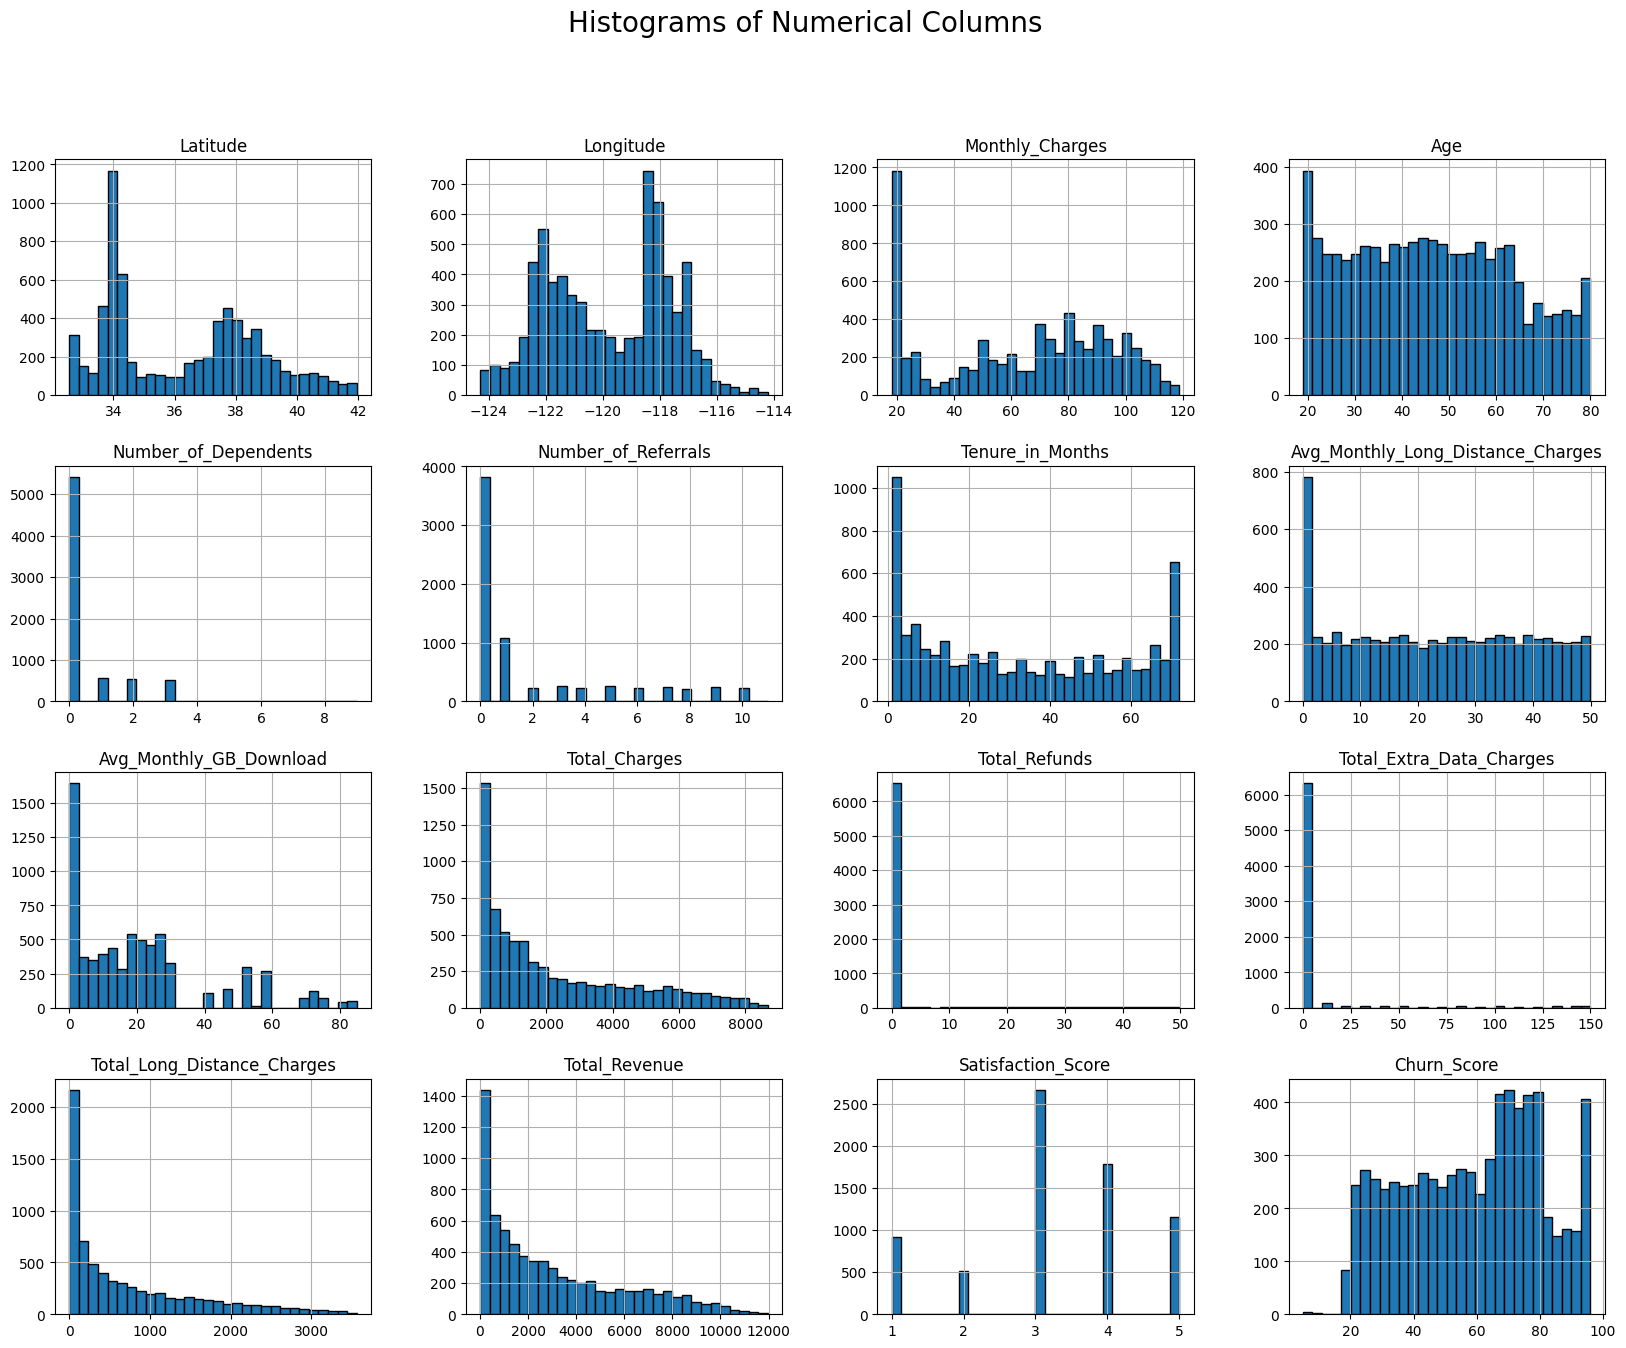

In [33]:
# Generate the plots
plot_histograms(merged_df)

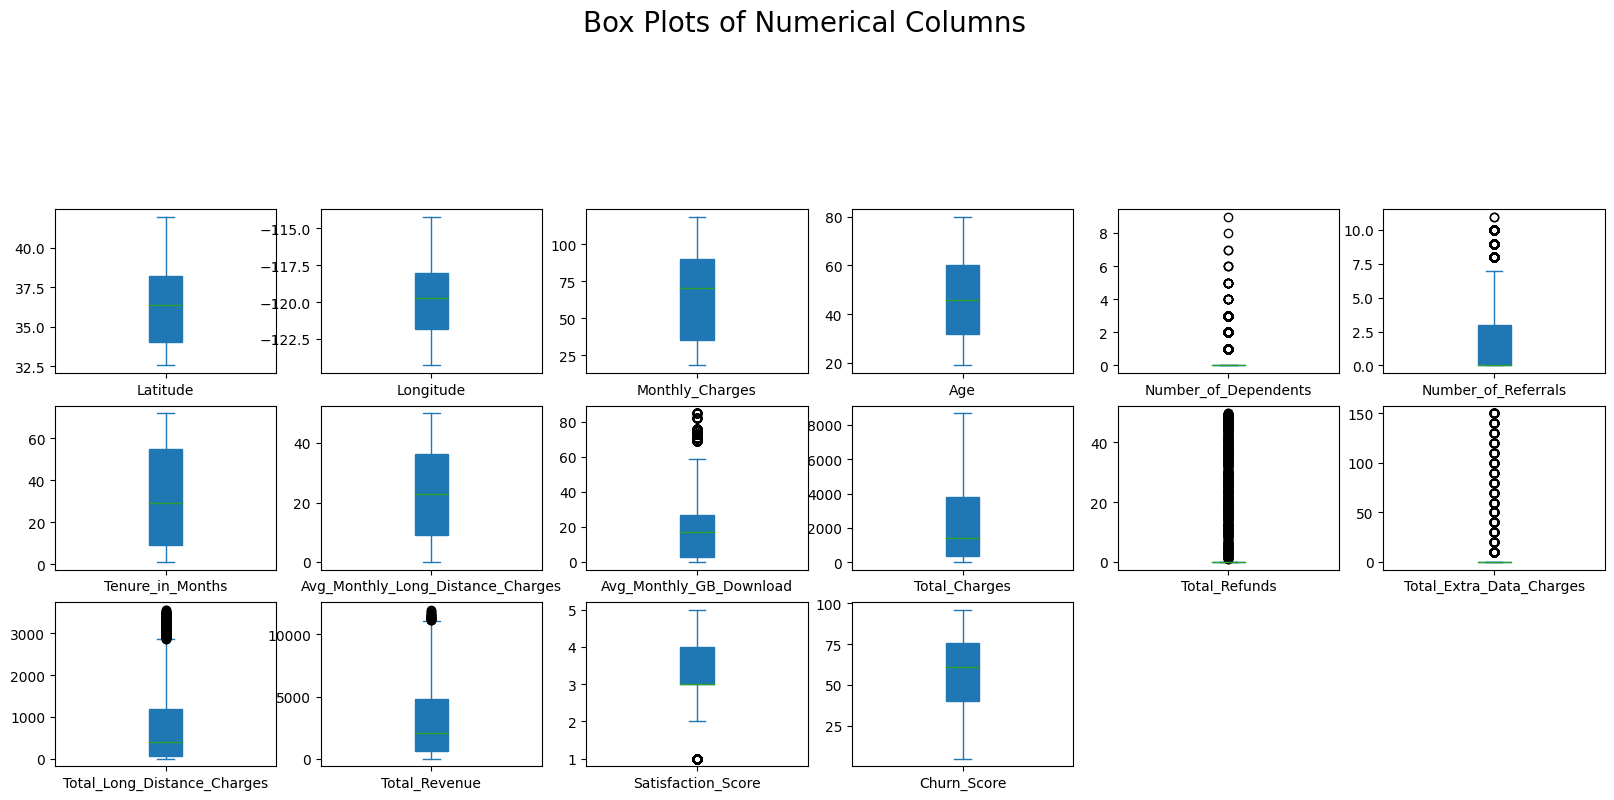

In [34]:
plot_boxplots(merged_df)

* Bar chart comparing Number of Churn- Yes & Churn-No

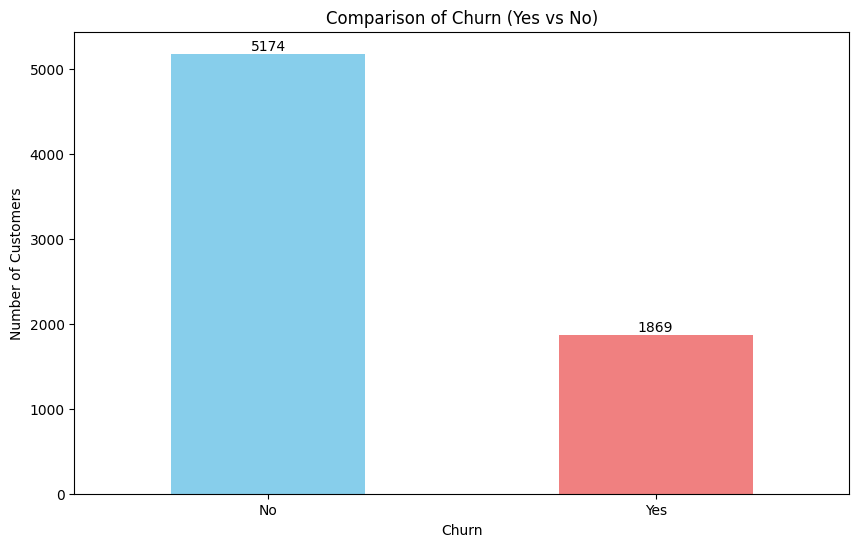

In [35]:
# Count the occurrences of 'Yes' and 'No' in the 'Churn' column
churn_counts = merged_df['Churn'].value_counts()

# Plot the data
ax = churn_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Adding title, labels, and the number of occurrences on top of the bars
plt.title('Comparison of Churn (Yes vs No)')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

for index, value in enumerate(churn_counts):
    ax.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

* Below histogram showcases Churn-Yes & No by their respecitve satisfaction scores.

* As seen 1 to 3 ratings have all the churns; 4 & 5 have no churns.

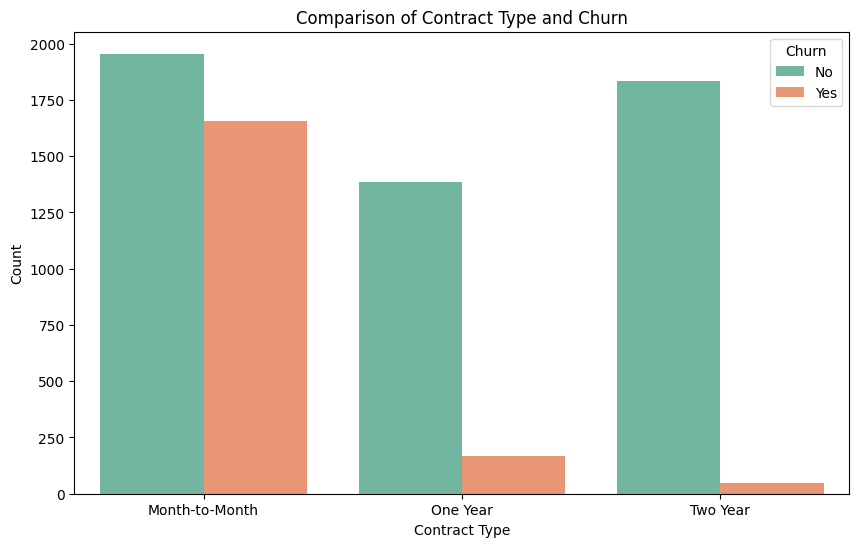

In [36]:
# Create a count plot to compare Contract type and Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Contract', hue='Churn', palette='Set2')

# Set plot title and labels
plt.title('Comparison of Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# Display the plot
plt.show()

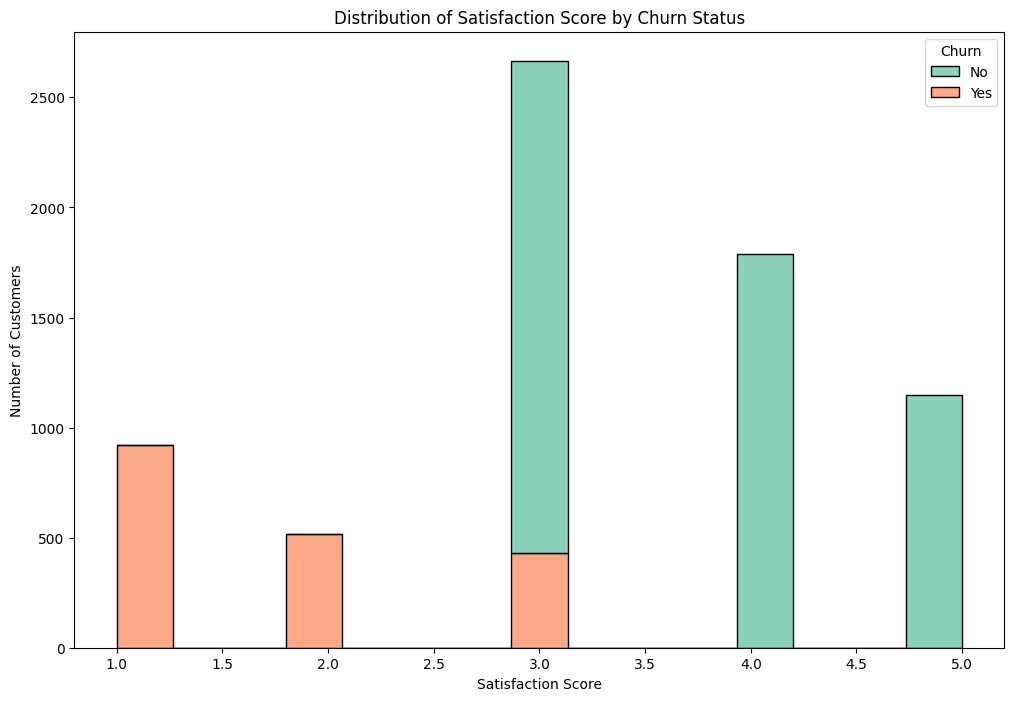

In [37]:
# Adjust the number of bins
number_of_bins = 15

plt.figure(figsize=(12, 8))
sns.histplot(data=merged_df, x='Satisfaction_Score', hue='Churn', multiple='stack', palette='Set2', bins=number_of_bins)
plt.title('Distribution of Satisfaction Score by Churn Status')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.show()

* Below is a heatmap of Churn -Yes & No alonside with their payment method.
* Bank Withdrawal has the highest churns among the payment methods.

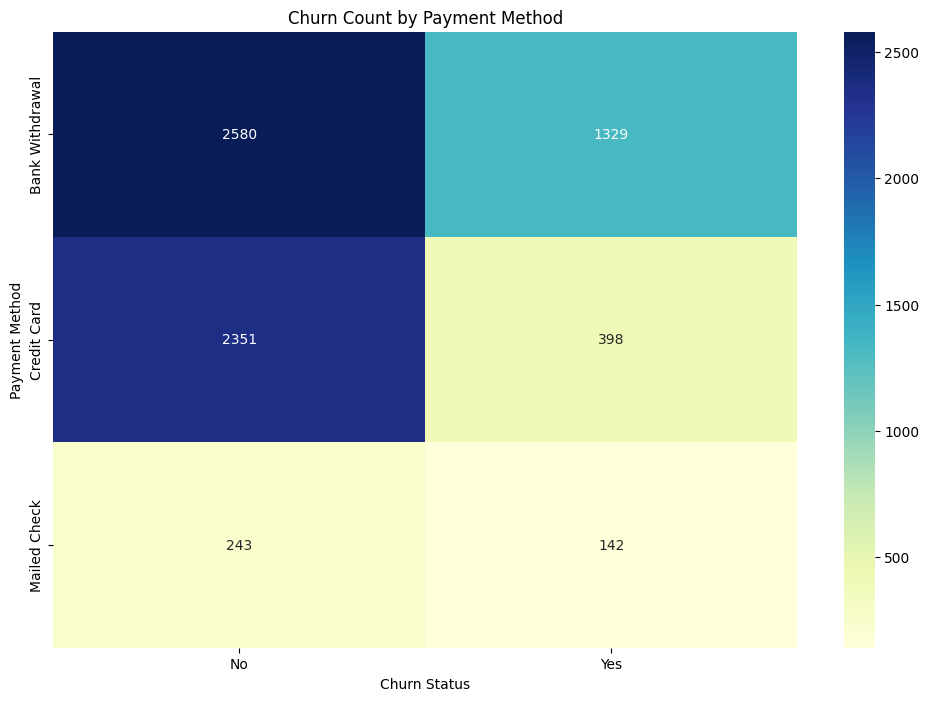

In [38]:
# Create a pivot table for heatmap
payment_churn_pivot = merged_df.pivot_table(index='Payment_Method', columns='Churn', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(payment_churn_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Churn Count by Payment Method')
plt.xlabel('Churn Status')
plt.ylabel('Payment Method')
plt.show()

* Below is a KDE plot of churns and non-churns by months of service.
* Churns seem to happen most during 0 to 20 months of a contract.

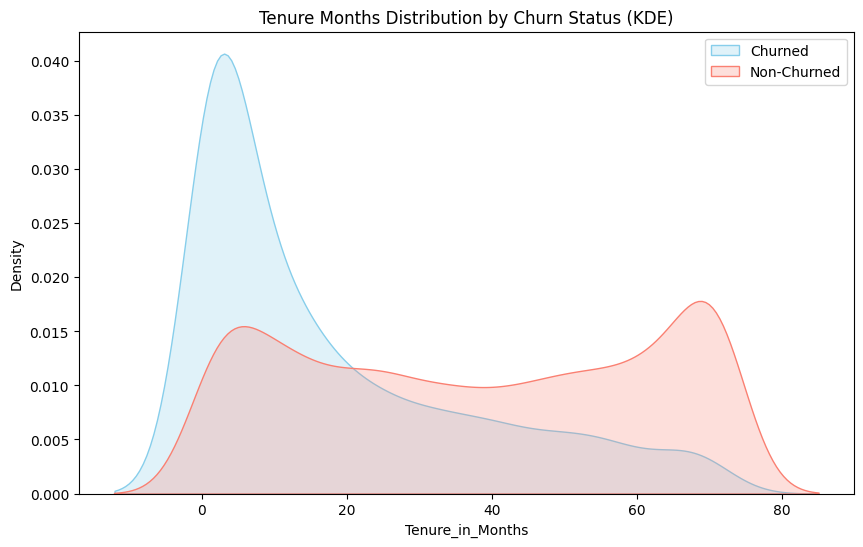

In [39]:
# Filter the merged DataFrame to get non-churned customers
non_churned_customers = merged_df[merged_df['Churn'] == 'No']

# Filter for churned customers #NEW
churned_customers = merged_df[merged_df['Churn'] == 'Yes']

# Check if 'Tenure_Months' column exists in the original DataFrame and if there are any non-churned customers
if 'Tenure_in_Months' in merged_df.columns and not non_churned_customers.empty:
    # Plot KDE plots for churned and non-churned customers
    plt.figure(figsize=(10, 6))
    sns.kdeplot(churned_customers['Tenure_in_Months'], fill=True, label='Churned', color='skyblue')
    sns.kdeplot(non_churned_customers['Tenure_in_Months'], fill=True, label='Non-Churned', color='salmon')
    plt.title('Tenure Months Distribution by Churn Status (KDE)')
    plt.xlabel('Tenure_in_Months')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

* Geographical map of all churns by latitude and longitude.

In [40]:
# Separate data based on churn
churn_yes = merged_df[merged_df['Churn'] == 'Yes']

# Create the base map object
base_map = folium.Map(location=[33.964131, -118.272783], zoom_start=10)

# Add churn 'Yes' data to the map
heat_data_yes = [[row['Latitude'], row['Longitude']] for index, row in churn_yes.iterrows()]
HeatMap(heat_data_yes, gradient={0.2: 'red', 1: 'red'}, radius=15, blur=10, max_zoom=1).add_to(base_map)

# Display the map
base_map

* Below is a histogram of monthly charges and it's corellation to churns.

* The meat of the churns happened between 70 to 100.

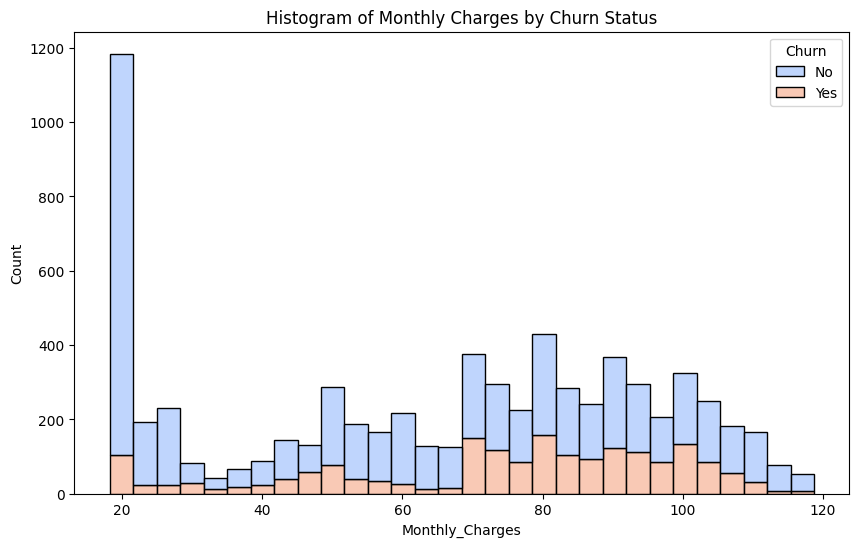

In [41]:
# Updated column name for Monthly Charges
column_name = 'Monthly_Charges'

# Histogram showing the frequency distribution of Monthly Charges for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x=column_name, hue='Churn', multiple='stack', palette='coolwarm', bins=30)
plt.xlabel('Monthly_Charges')
plt.ylabel('Count')
plt.title('Histogram of Monthly Charges by Churn Status')
plt.show()

* Horizontal bar graph of customer churns and the reason for churns.

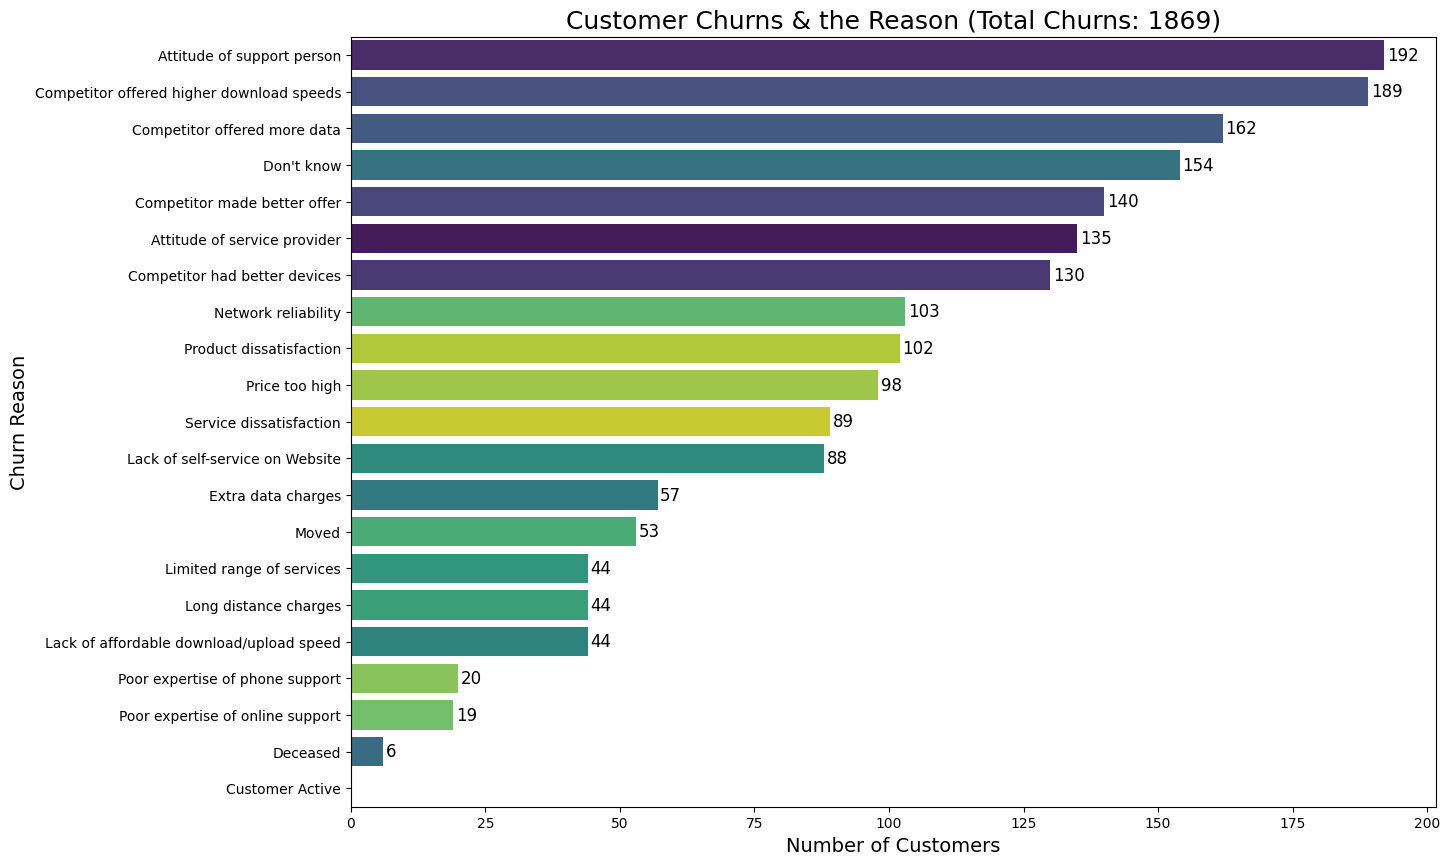

In [42]:
# Filter the data for churned customers
churned_customers = merged_df[merged_df['Churn'] == 'Yes']

# Count the no. of occurrences for each churn reason
churn_reason_counts = churned_customers['Churn_Reason'].value_counts()

# Calculate the total number of churns
total_churns = churn_reason_counts.sum()

# Create count plot
plt.figure(figsize=(14, 10))
ax = sns.countplot(y='Churn_Reason', data=churned_customers, order=churn_reason_counts.index, palette='viridis', hue='Churn_Reason', dodge=False)

# Add totals on the bars
for p in ax.patches:
    width = p.get_width()  # Get bar width
    plt.text(width + 0.5,  # Set text position (horizontal) with increased offset
             p.get_y() + p.get_height() / 2,  # Set text position (vertical)
             int(width),  # Text content
             ha='left',  # Horizontal alignment to the left of the bar
             va='center',  # Vertical alignment to the center of the bar
             fontsize=12)  # Font size

# Add the total number of churns to the title
plt.title(f'Customer Churns & the Reason (Total Churns: {total_churns})', fontsize=18)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Churn Reason', fontsize=14)
plt.legend([], [], frameon=False)  # Hide the legend
plt.show()

* Correlation heatmap

In [43]:
# Select only numeric columns from merged_df
numeric_columns = merged_df.select_dtypes(include=['number'])

# Exclude latitude and longitude
numeric_columns = numeric_columns.drop(columns=['Latitude', 'Longitude'], errors='ignore')

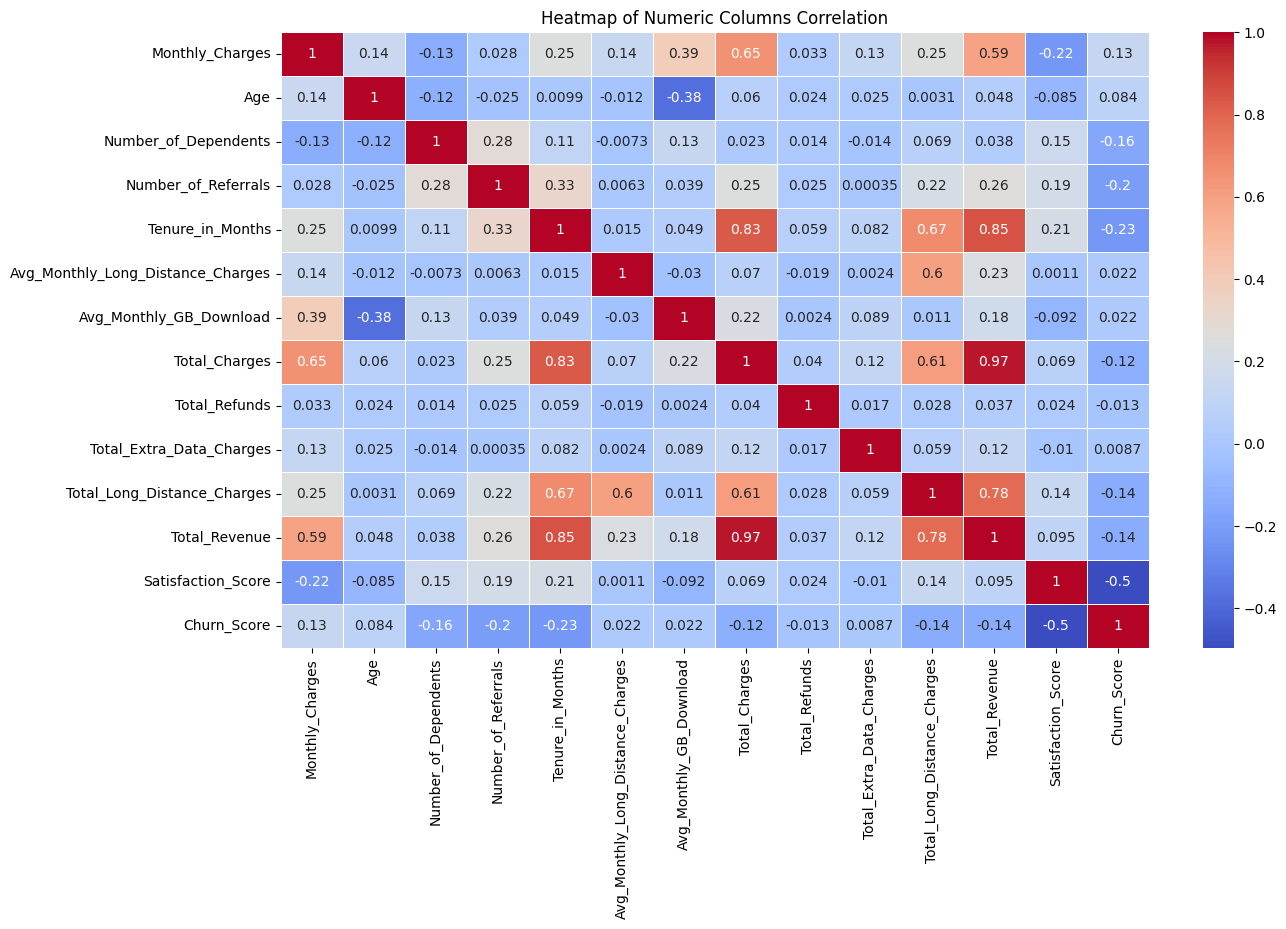

In [44]:
# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numeric Columns Correlation')
plt.show()

* Descriptive Statistics for numeric columns

In [45]:
# Identify numeric columns of types int64 and float64
numeric_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute descriptive statistics on the DataFrame, not the column list
desc_stats = merged_df[numeric_columns].describe()

# Style the DataFrame
styled_desc_stats = desc_stats.style.format("{:.2f}").background_gradient(cmap='coolwarm')
styled_desc_stats

,Latitude,Longitude,Monthly_Charges,Age,Number_of_Dependents,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Satisfaction_Score,Churn_Score
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,36.28,-119.80,64.76,46.51,0.47,1.95,32.39,22.96,20.52,2280.38,1.96,6.86,749.10,3034.38,3.24,58.60
std,2.46,2.16,30.09,16.75,0.96,3.00,24.54,15.45,20.42,2266.22,7.90,25.10,846.66,2865.20,1.20,21.33
min,32.56,-124.30,18.25,19.00,0.00,0.00,1.00,0.00,0.00,18.80,0.00,0.00,0.00,21.36,1.00,5.00
25%,34.03,-121.82,35.50,32.00,0.00,0.00,9.00,9.21,3.00,400.15,0.00,0.00,70.55,605.61,3.00,40.00
50%,36.39,-119.73,70.35,46.00,0.00,0.00,29.00,22.89,17.00,1394.55,0.00,0.00,401.44,2108.64,3.00,61.00
75%,38.22,-118.04,89.85,60.00,0.00,3.00,55.00,36.39,27.00,3786.60,0.00,0.00,1191.10,4801.15,4.00,75.50
max,41.96,-114.19,118.75,80.00,9.00,11.00,72.00,49.99,85.00,8684.80,49.79,150.00,3564.72,11979.34,5.00,96.00


* Monthly Charges: Customers pay an average of 64.33 per month, with charges ranging from 19.20 to 103.95.
* Age: The average age of customers is 46.15 years, spanning from 19 to 72 years old.
* Number of Dependents: On average, customers have 0.38 dependents, with a maximum of 2 dependents.
* Number of Referrals: Customers have an average of 1.85 referrals, ranging from 0 to 8.
* Tenure in Months: The average customer tenure is 32.26 months, varying between 1 and 70 months.
* Avg Monthly Long Distance Charges: Customers incur an average of 22.73 in long-distance charges monthly, ranging from 0.00 to 45.04.
* Avg Monthly GB Download: Customers download an average of 19.43 GB per month, with a range from 0 to 56 GB.
* Total Charges: The average total charges for customers are 2191.47, with amounts ranging from 19.90 to 6141.03.
* Total Refunds: The average total refunds are 0.00, indicating no refunds in the dataset.
* Total Extra Data Charges: Customers incur an average of 1.03 in extra data charges, with a range from 0.00 to 10.00.
* Total Long Distance Charges: The average total long-distance charges are 702.13, ranging from 0.00 to 2181.09.
* Total Revenue: Customers contribute an average total revenue of 2919.06, with a range from 31.02 to 7840.43.
* Satisfaction Score: The average customer satisfaction score is 3.24, on a scale of 1 to 5.
* Churn Score: The average churn score is 58.17, with values ranging from 20 to 88.

In [46]:
# CSV ready for Pre- modelling

# Specify the file path where you want to save the CSV file
csv_file_path = 'Pre- Modelling.csv'

# Save merged_df to CSV
merged_df.to_csv(csv_file_path, index=False)

# 9. Dummy Variables

Dropping below from merged_df before creating dummy variables:

* Country (just 1 country)
* State ( just 1 state)
* City ( 850+ Cities, skewes modelling)
* Latitude (extremely granular, and unnecessary for modelling)
* Longitude (extremely granular, and unnecessary for modelling)
* Churn_Score (this is the score that was derived from a previous modelling effort, from where the dataset was sourced)
* Churn_Reason (same as above)
* Churn_Category (same as above)
* Satisfaction_Score (this makes modelling too easy, as the models accurately predicts churns based off obvious satisfaction scores)
* Dropping Total_Long_Distance_Charges, Total_Charges, Total_Extra_Data_Charges, Total_Revenue, Total_Monthly_Charge & Total_Long_Distance_Charge as these variables act as a bias in modeling. Charges are obvious indicators of Churn.


In [47]:
# Drop specified columns from merged_df
pre_dummy_df = merged_df.drop(columns=
 ['Country', 'State', 'City', 'Latitude', 'Longitude',
  'Churn_Score', 'Churn_Reason', 'Churn_Category',
  'Customer_Status', 'Satisfaction_Score',
  'Total_Extra_Data_Charges', 'Total_Revenue',
  'Total_Monthly_Charge', 'Total_Long_Distance_Charge',
  'Total_Charges', 'Total_Long_Distance_Charges'], errors='ignore')

In [48]:
# Create a DataFrame for the column names of merged_df
columns_pre_dummy_df = pd.DataFrame({'pre_dummy_df': pre_dummy_df.columns})

# Print the column names in table format using tabulate

print("Column names in pre_dummy_df:")
print(tabulate(columns_pre_dummy_df, headers='keys', tablefmt='psql'))

Column names in pre_dummy_df:
+----+-----------------------------------+
|    | pre_dummy_df                      |
|----+-----------------------------------|
|  0 | Monthly_Charges                   |
|  1 | Dependents                        |
|  2 | Churn                             |
|  3 | Age                               |
|  4 | Under_30                          |
|  5 | Number_of_Dependents              |
|  6 | Referred_a_Friend                 |
|  7 | Number_of_Referrals               |
|  8 | Tenure_in_Months                  |
|  9 | Offer                             |
| 10 | Avg_Monthly_Long_Distance_Charges |
| 11 | Multiple_Lines                    |
| 12 | Internet_Service                  |
| 13 | Internet_Type                     |
| 14 | Avg_Monthly_GB_Download           |
| 15 | Online_Security                   |
| 16 | Online_Backup                     |
| 17 | Device_Protection_Plan            |
| 18 | Premium_Tech_Support              |
| 19 | Streaming_TV     

In [49]:
pre_dummy_df.dtypes

,0
Monthly_Charges,float64
Dependents,category
Churn,category
Age,int64
Under_30,category
Number_of_Dependents,int64
Referred_a_Friend,category
Number_of_Referrals,int64
Tenure_in_Months,int64
Offer,category


In [50]:
# Automatically detect categorical columns
categorical_columns = pre_dummy_df.select_dtypes(include=['category']).columns.tolist()

In [51]:
# Generate dummy variables and ensure they are integers (0 and 1)
post_dummy_df = pd.get_dummies(pre_dummy_df, columns=categorical_columns, drop_first=False).astype(int)

In [52]:
post_dummy_df.columns

Index(['Monthly_Charges', 'Age', 'Number_of_Dependents', 'Number_of_Referrals',
       'Tenure_in_Months', 'Avg_Monthly_Long_Distance_Charges',
       'Avg_Monthly_GB_Download', 'Total_Refunds', 'Dependents_No',
       'Dependents_Yes', 'Churn_No', 'Churn_Yes', 'Under_30_No',
       'Under_30_Yes', 'Referred_a_Friend_No', 'Referred_a_Friend_Yes',
       'Offer_Offer A', 'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D',
       'Offer_Offer E', 'Offer_Unknown Offer', 'Multiple_Lines_No',
       'Multiple_Lines_Yes', 'Internet_Service_No', 'Internet_Service_Yes',
       'Internet_Type_Cable', 'Internet_Type_DSL', 'Internet_Type_Fiber Optic',
       'Internet_Type_No Internet Service', 'Online_Security_No',
       'Online_Security_Yes', 'Online_Backup_No', 'Online_Backup_Yes',
       'Device_Protection_Plan_No', 'Device_Protection_Plan_Yes',
       'Premium_Tech_Support_No', 'Premium_Tech_Support_Yes',
       'Streaming_TV_No', 'Streaming_TV_Yes', 'Streaming_Movies_No',
       'Streaming_

In [53]:
# Replace spaces with underscores in column names
post_dummy_df.columns = post_dummy_df.columns.str.replace(' ', '_')

In [54]:
# Display the first 5 rows of 'post_dummy_df'

print("First 5 rows of the updated dataframe in table format:")
print(tabulate(post_dummy_df.head(), headers='keys', tablefmt='psql'))

First 5 rows of the updated dataframe in table format:
+----+-------------------+-------+------------------------+-----------------------+--------------------+-------------------------------------+---------------------------+-----------------+-----------------+------------------+------------+-------------+---------------+----------------+------------------------+-------------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------------+---------------------+----------------------+-----------------------+------------------------+-----------------------+---------------------+-----------------------------+-------------------------------------+----------------------+-----------------------+--------------------+---------------------+-----------------------------+------------------------------+---------------------------+----------------------------+-------------------+--------------------+-----------------------+--------------

In [55]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'post_dummy_df.csv'

# Save merged_df to CSV
post_dummy_df.to_csv(csv_file_path, index=False)

# 10. Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = post_dummy_df.drop(columns=['Churn_Yes'])
y = post_dummy_df['Churn_Yes']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Training Features (X_train): 4930 rows, 1196 columns

Testing Features (X_test): 2113 rows, 1196 columns

Training Target (y_train): 4930 rows

Testing Target (y_test): 2113 rows

# 11. Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1552
           1       0.96      0.92      0.94       561

    accuracy                           0.97      2113
   macro avg       0.97      0.95      0.96      2113
weighted avg       0.97      0.97      0.97      2113

Logistic Regression ROC AUC Score: 0.95
Logistic Regression Confusion Matrix:
 [[1531   21]
 [  46  515]]


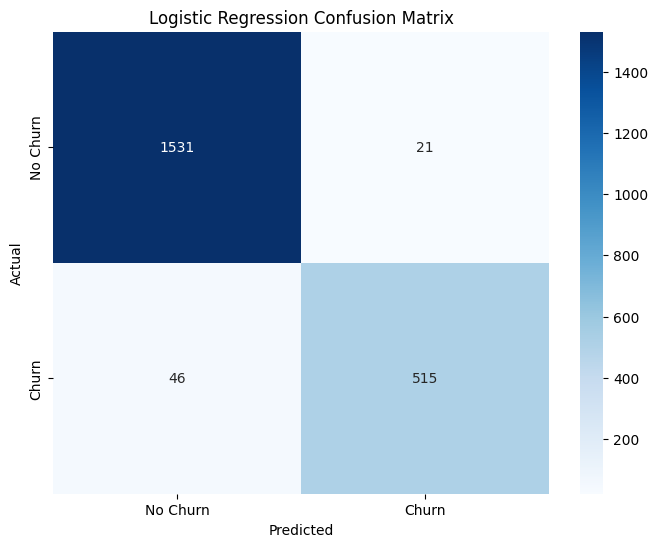

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Logistic Regression with max_iter
log_reg = LogisticRegression(max_iter=30, random_state=1)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Classification Report
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))

# ROC AUC Score
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print(f"Logistic Regression ROC AUC Score: {roc_auc_log_reg:.2f}")

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Confusion Matrix:\n", cm_log_reg)

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

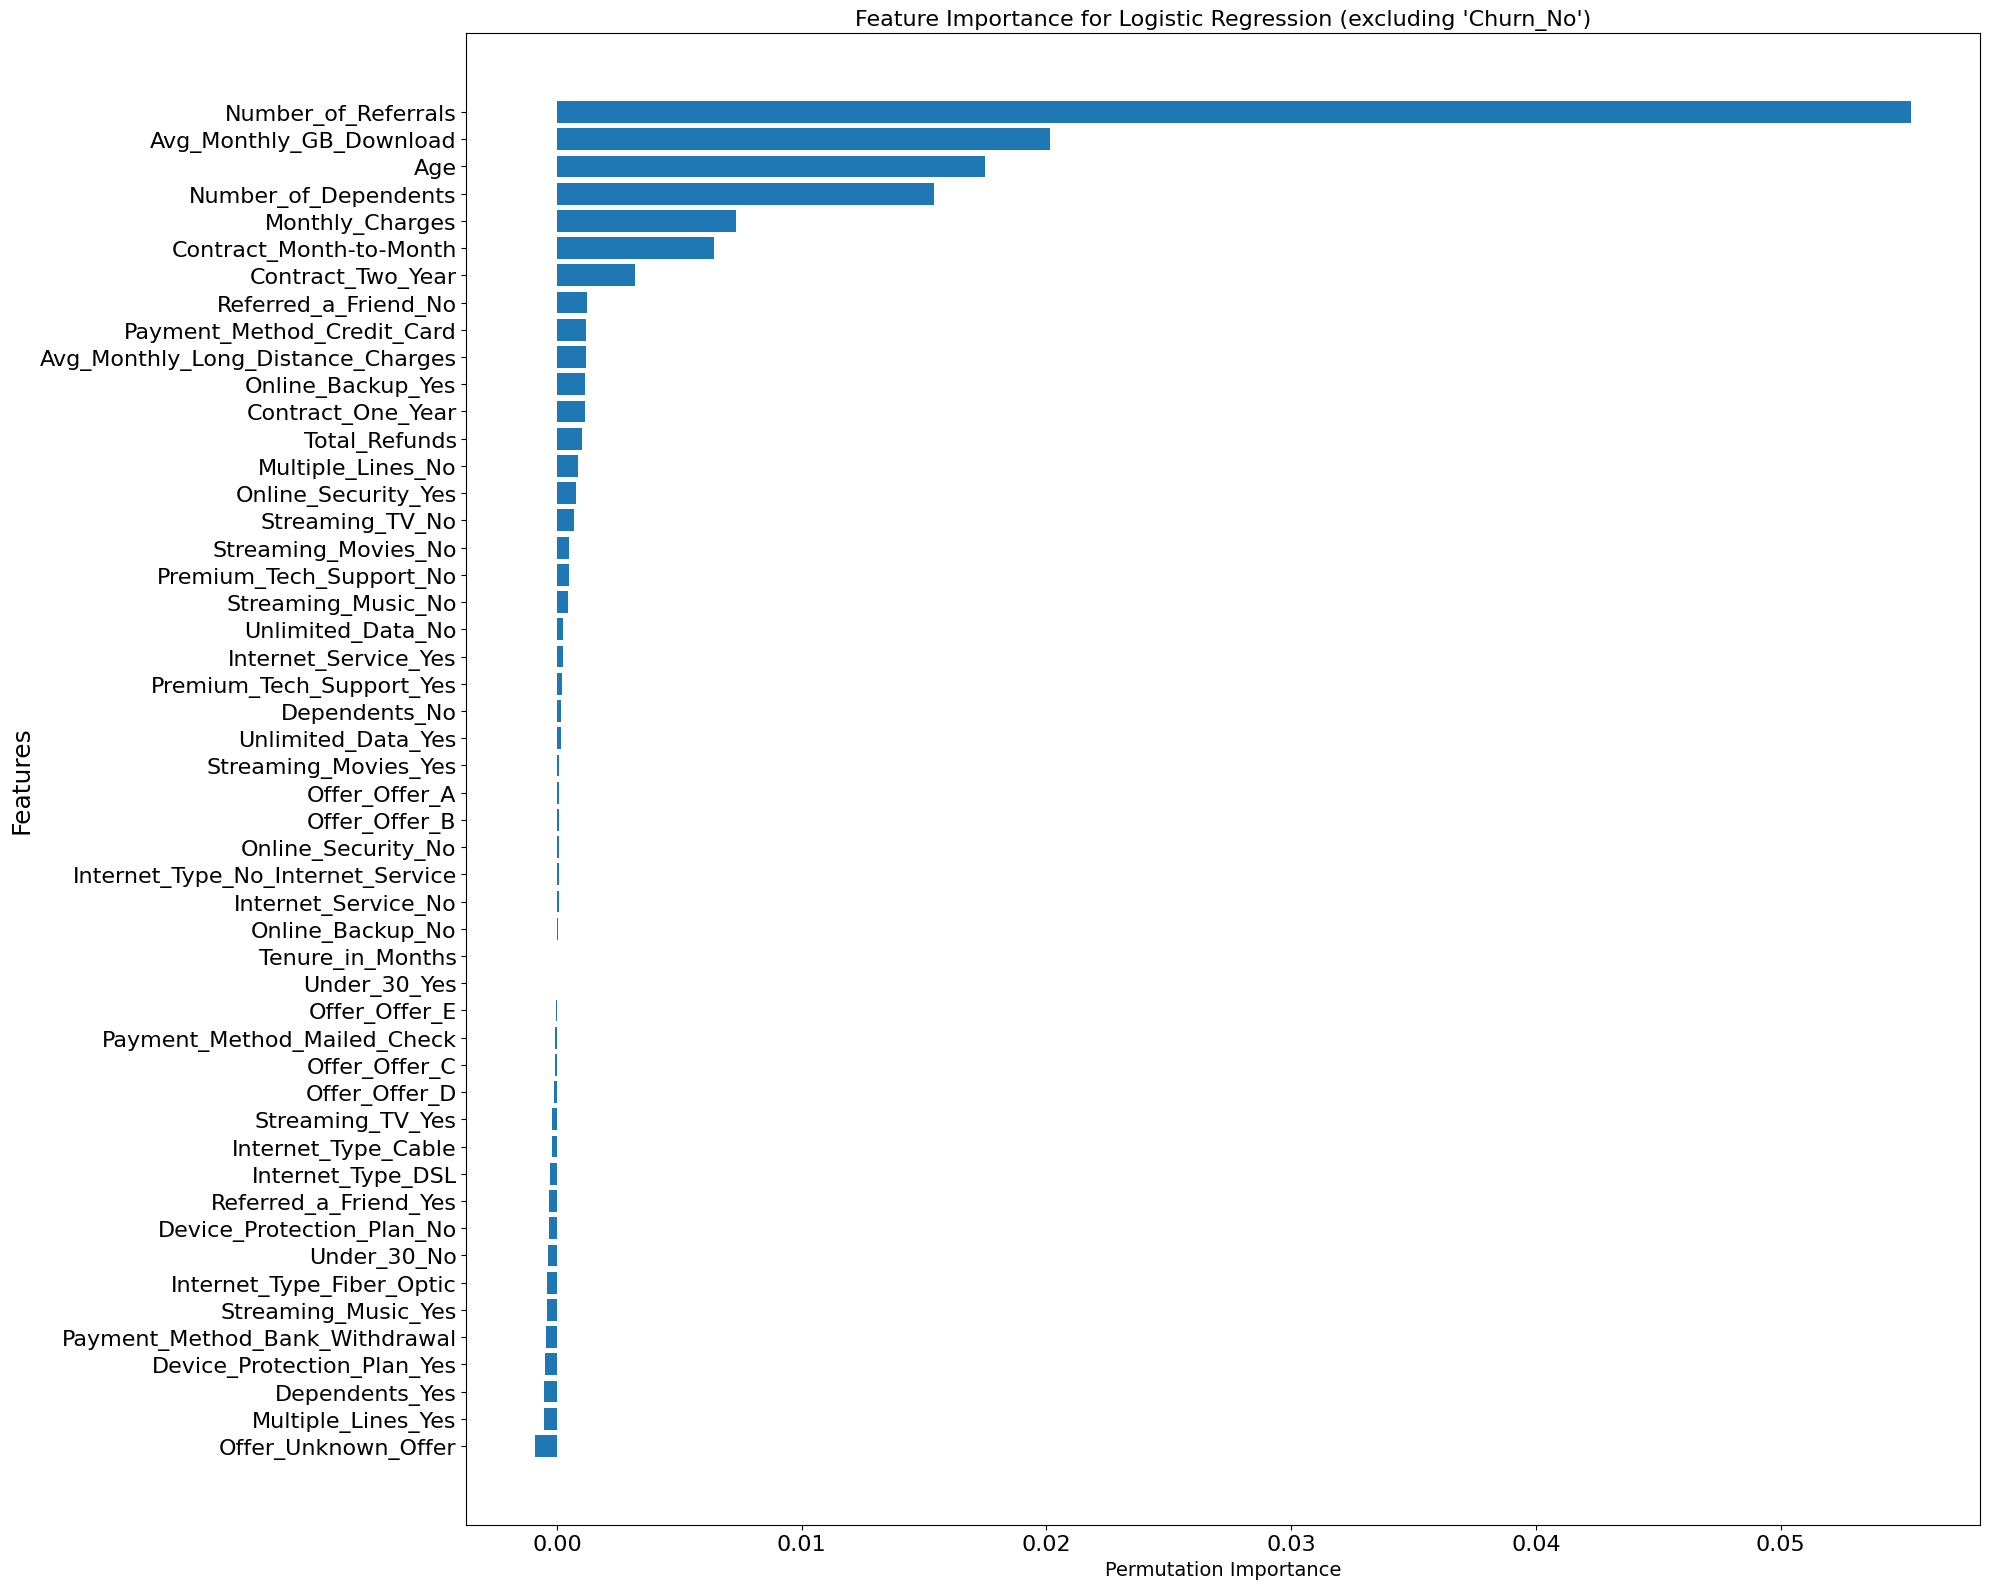

In [58]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance including 'Churn_No'
result = permutation_importance(log_reg, X_train, y_train, n_repeats=5, random_state=1, n_jobs=-1)

# Get indices of features excluding 'Churn_No'
feature_names = np.array(X_train.columns)
sorted_idx = result.importances_mean.argsort()

# Exclude 'Churn_No' from the plot
sorted_idx = sorted_idx[feature_names[sorted_idx] != 'Churn_No']

# Plot feature importance excluding 'Churn_No'
plt.figure(figsize=(20, 16))  # Increase the figure size
plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance", fontsize=14)
plt.ylabel("Features", fontsize=18)
plt.title("Feature Importance for Logistic Regression (excluding 'Churn_No')", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Apply tight layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
### Forward Regression

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packa

Forward Regression Classification Report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1552
           1       0.70      0.62      0.66       561

    accuracy                           0.83      2113
   macro avg       0.79      0.76      0.77      2113
weighted avg       0.82      0.83      0.83      2113

Forward Regression ROC AUC Score: 0.76
Forward Regression Confusion Matrix:
 [[1406  146]
 [ 213  348]]


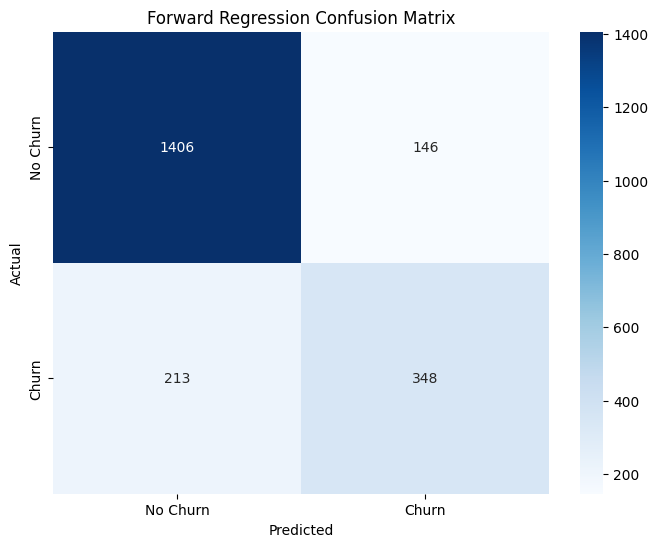

In [59]:
import statsmodels.api as sm

def forward_selection(X, y):
    initial_features = []
    best_features = initial_features.copy()

    while len(best_features) < len(X.columns):
        remaining_features = list(set(X.columns) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            try:
                model = sm.Logit(y, sm.add_constant(X[best_features + [new_column]])).fit(disp=0)
                new_pval[new_column] = model.pvalues[new_column]
            except np.linalg.LinAlgError:
                new_pval[new_column] = 1
        min_pval = new_pval.min()
        if min_pval < 0.05:
            best_features.append(new_pval.idxmin())
        else:
            break

    return best_features

selected_features = forward_selection(X_train, y_train)

log_reg = LogisticRegression(max_iter=30, random_state=1)
log_reg.fit(X_train[selected_features], y_train)
y_pred_log_reg = log_reg.predict(X_test[selected_features])

# Classification Report
print("Forward Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))

# ROC AUC Score
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print(f"Forward Regression ROC AUC Score: {roc_auc_log_reg:.2f}")

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Forward Regression Confusion Matrix:\n", cm_log_reg)

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Forward Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
### Backward Regression

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


Backward Regression Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1552
           1       0.96      0.92      0.94       561

    accuracy                           0.97      2113
   macro avg       0.97      0.95      0.96      2113
weighted avg       0.97      0.97      0.97      2113

Backward Regression ROC AUC Score: 0.95
Backward Regression Confusion Matrix:
 [[1531   21]
 [  46  515]]


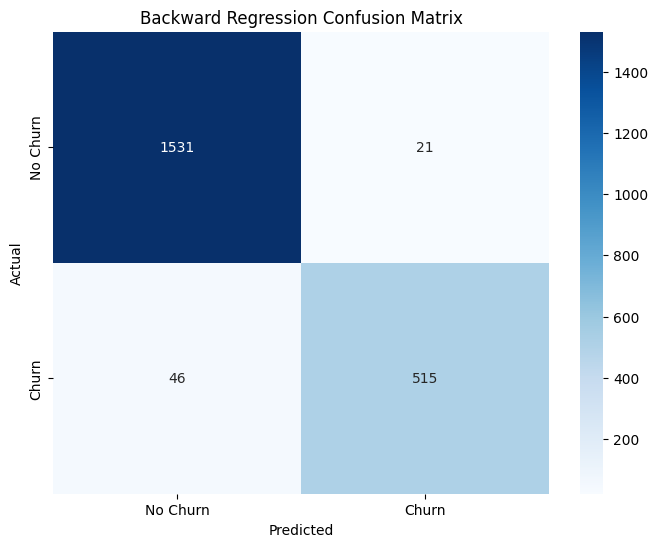

In [60]:
import statsmodels.api as sm

def backward_elimination(X, y):
    features = X.columns.tolist()

    while len(features) > 0:
        try:
            model = sm.Logit(y, sm.add_constant(X[features])).fit(disp=0)
            pvals = model.pvalues[1:]  # exclude the constant term
        except np.linalg.LinAlgError:
            break
        max_pval = pvals.max()
        if max_pval >= 0.05:
            excluded_feature = pvals.idxmax()
            features.remove(excluded_feature)
        else:
            break

    return features

selected_features = backward_elimination(X_train, y_train)

log_reg = LogisticRegression(max_iter=30, random_state=1)
log_reg.fit(X_train[selected_features], y_train)
y_pred_log_reg = log_reg.predict(X_test[selected_features])

# Classification Report
print("Backward Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))

# ROC AUC Score
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print(f"Backward Regression ROC AUC Score: {roc_auc_log_reg:.2f}")

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Backward Regression Confusion Matrix:\n", cm_log_reg)

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Backward Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 12. KNeighborsClassifier

K-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1552
           1       0.56      0.48      0.52       561

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.75      0.76      0.76      2113

K-Nearest Neighbors ROC AUC Score: 0.67
K-Nearest Neighbors Confusion Matrix:
 [[1344  208]
 [ 292  269]]


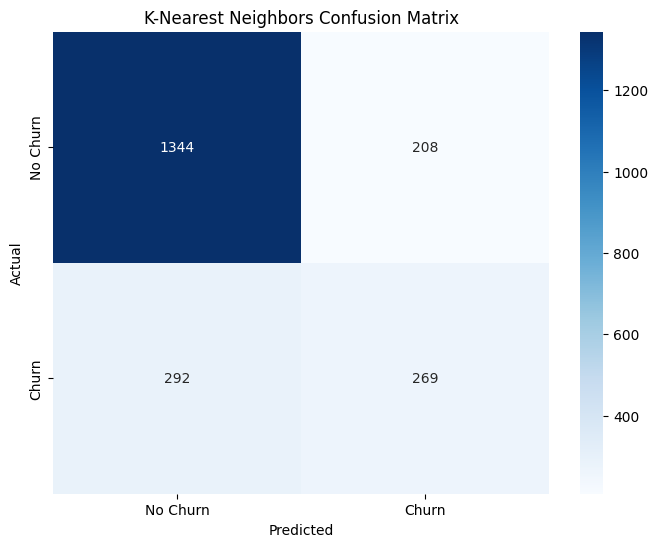

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Classification Report
print("K-Nearest Neighbors Classification Report")
print(classification_report(y_test, y_pred_knn))

# ROC AUC Score
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors ROC AUC Score: {roc_auc_knn:.2f}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("K-Nearest Neighbors Confusion Matrix:\n", cm_knn)

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 13. Neural Network

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1552
           1       0.98      0.90      0.94       561

    accuracy                           0.97      2113
   macro avg       0.97      0.95      0.96      2113
weighted avg       0.97      0.97      0.97      2113

MLPClassifier ROC AUC Score: 0.95
MLPClassifier Confusion Matrix:
 [[1541   11]
 [  54  507]]


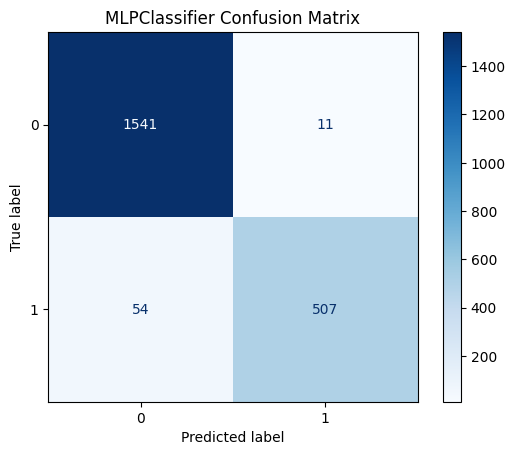

In [62]:
from sklearn.neural_network import MLPClassifier

# Neural Network with MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(25,), max_iter=30, random_state=1)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Classification Report
print("MLPClassifier Classification Report")
print(classification_report(y_test, y_pred_mlp))

# ROC AUC Score
roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp)
print(f"MLPClassifier ROC AUC Score: {roc_auc_mlp:.2f}")

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print("MLPClassifier Confusion Matrix:\n", cm_mlp)

# Confusion Matrix Heatmap

disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot(cmap='Blues')
plt.title('MLPClassifier Confusion Matrix')
plt.show()

# 14. Random Forest

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1552
           1       1.00      0.94      0.97       561

    accuracy                           0.98      2113
   macro avg       0.99      0.97      0.98      2113
weighted avg       0.98      0.98      0.98      2113

Random Forest ROC AUC Score: 0.97
Random Forest Confusion Matrix:
 [[1552    0]
 [  35  526]]


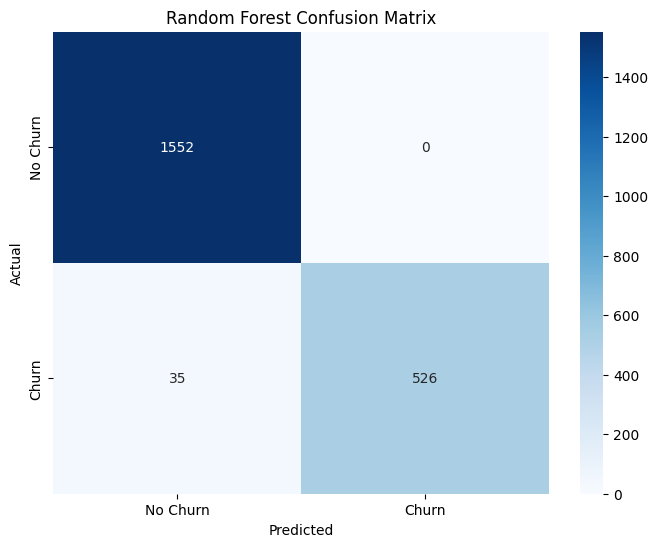

In [63]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with specified parameters
random_forest = RandomForestClassifier(n_estimators=2, random_state=1)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_random_forest = random_forest.predict(X_test)

# Classification Report
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_random_forest))

# ROC AUC Score
roc_auc_random_forest = roc_auc_score(y_test, y_pred_random_forest)
print(f"Random Forest ROC AUC Score: {roc_auc_random_forest:.2f}")

# Confusion Matrix
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
print("Random Forest Confusion Matrix:\n", cm_random_forest)

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 86.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


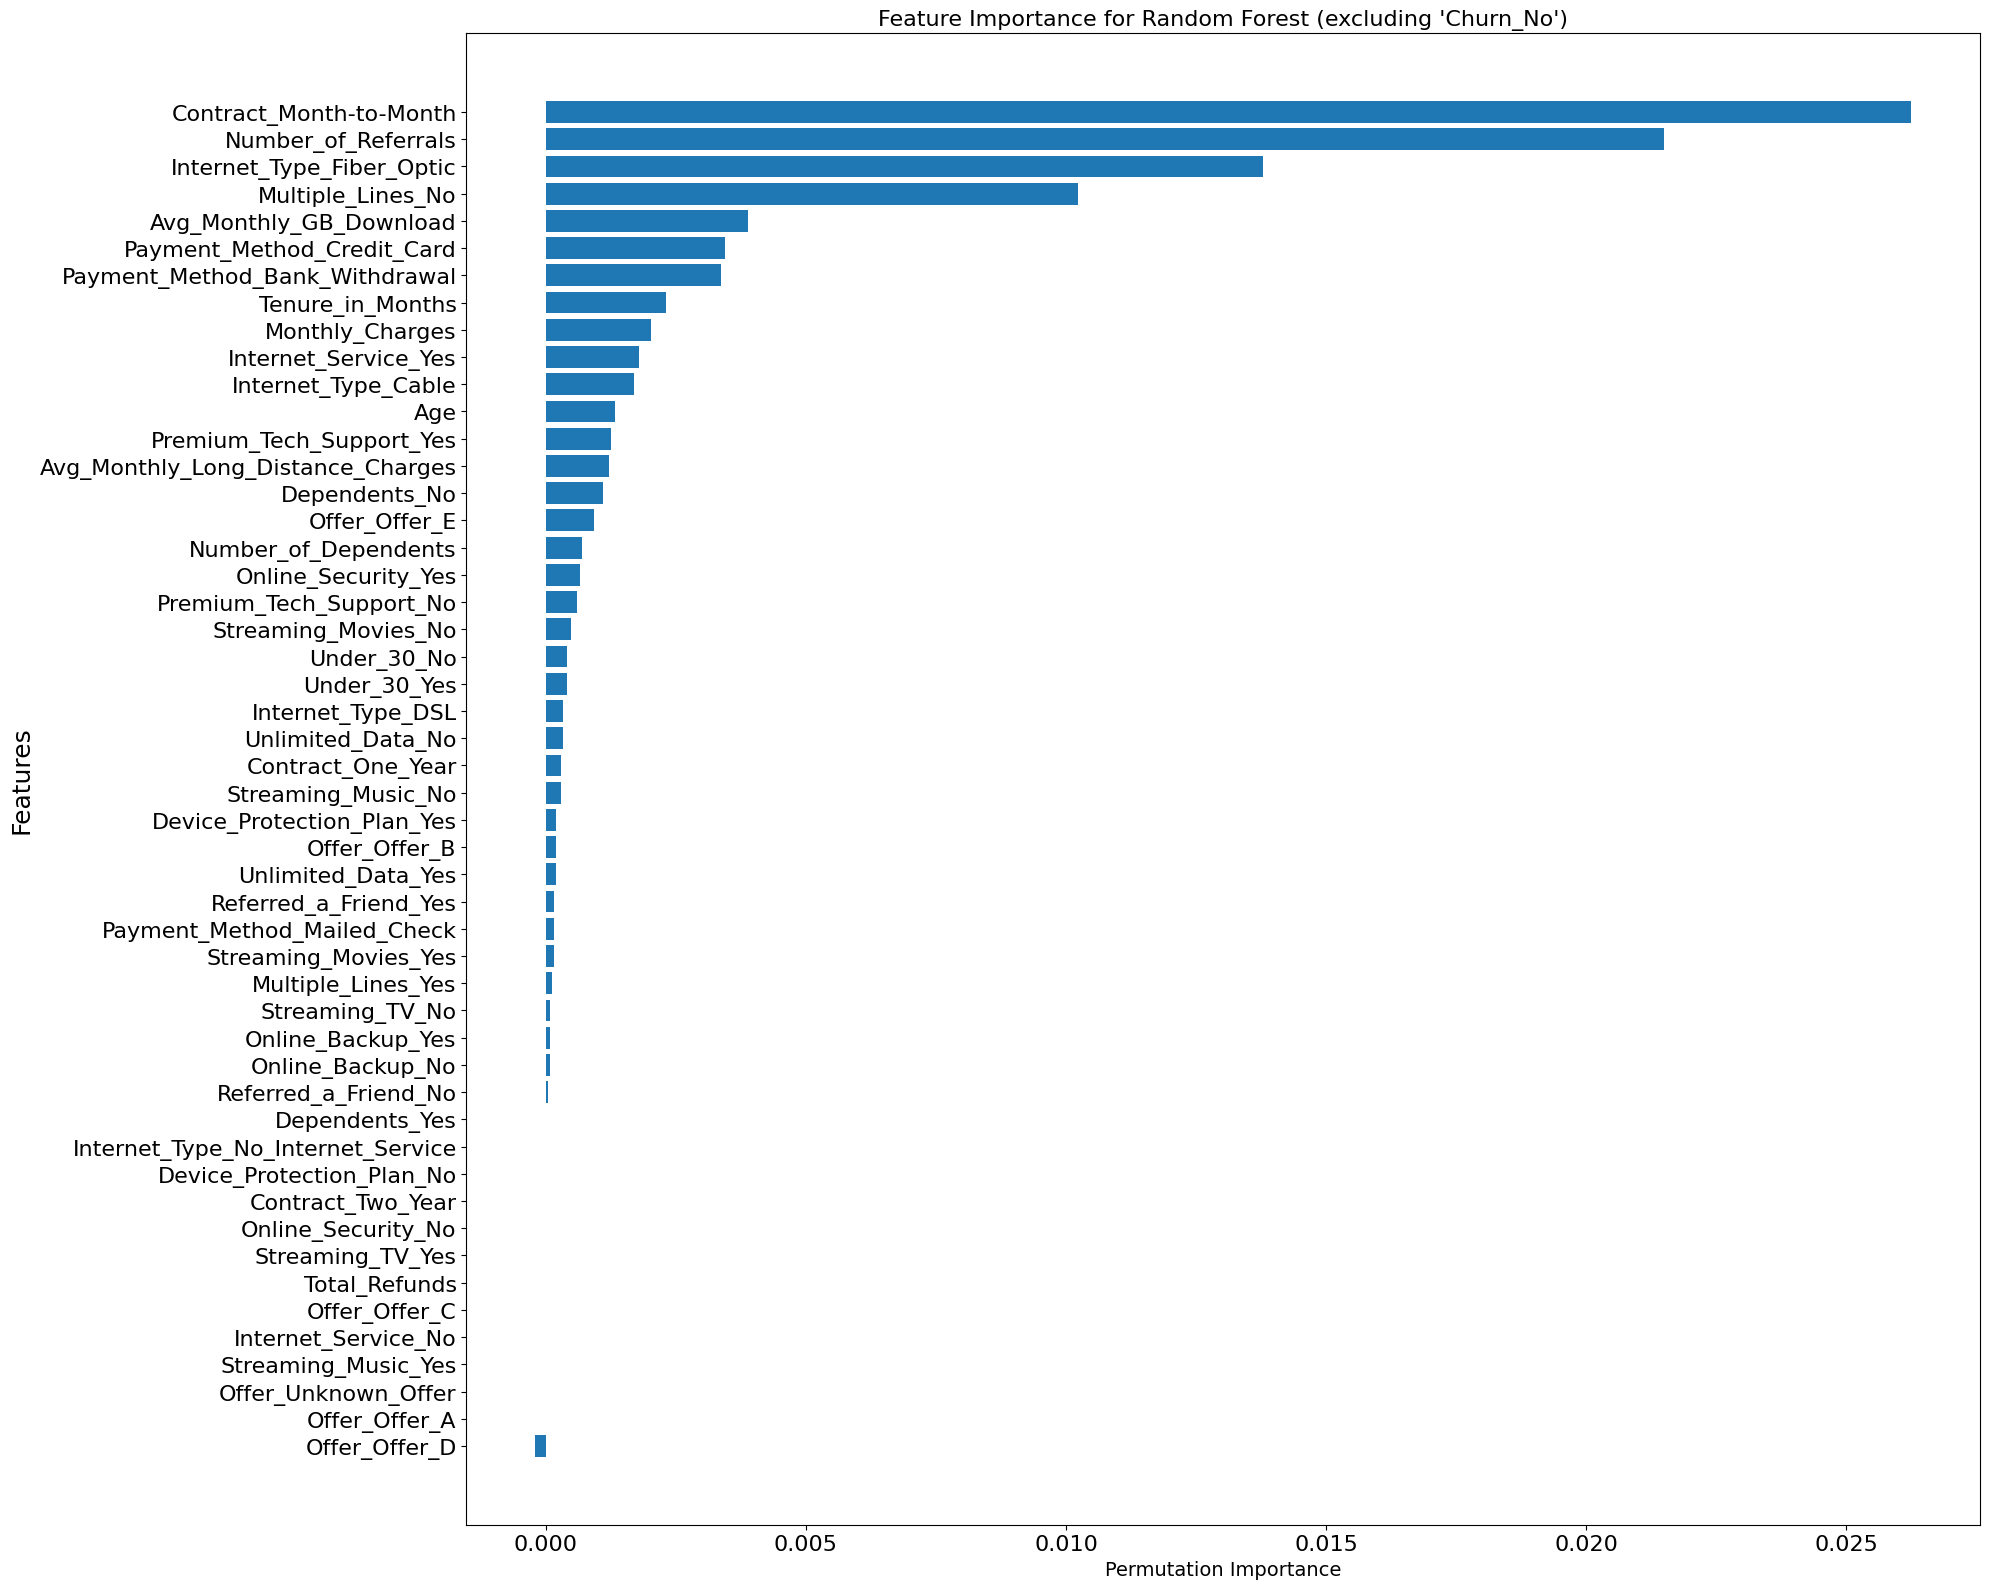

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train and y_train are already defined and RandomForestClassifier is used
# Initialize and train the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=2, random_state=1)
random_forest.fit(X_train, y_train)

# Compute permutation feature importance
result = permutation_importance(random_forest, X_train, y_train, n_repeats=5, random_state=1, n_jobs=-1)

# Get indices of features excluding 'Churn_No'
feature_names = np.array(X_train.columns)
sorted_idx = result.importances_mean.argsort()

# Exclude 'Churn_No' from the plot
sorted_idx = sorted_idx[feature_names[sorted_idx] != 'Churn_No']

# Plot feature importance excluding 'Churn_No'
plt.figure(figsize=(20, 16))  # Increase the figure size
plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance", fontsize=14)
plt.ylabel("Features", fontsize=18)
plt.title("Feature Importance for Random Forest (excluding 'Churn_No')", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Apply tight layout
plt.tight_layout()

# Display the plot
plt.show()

In [67]:
from sklearn.inspection import PartialDependenceDisplay

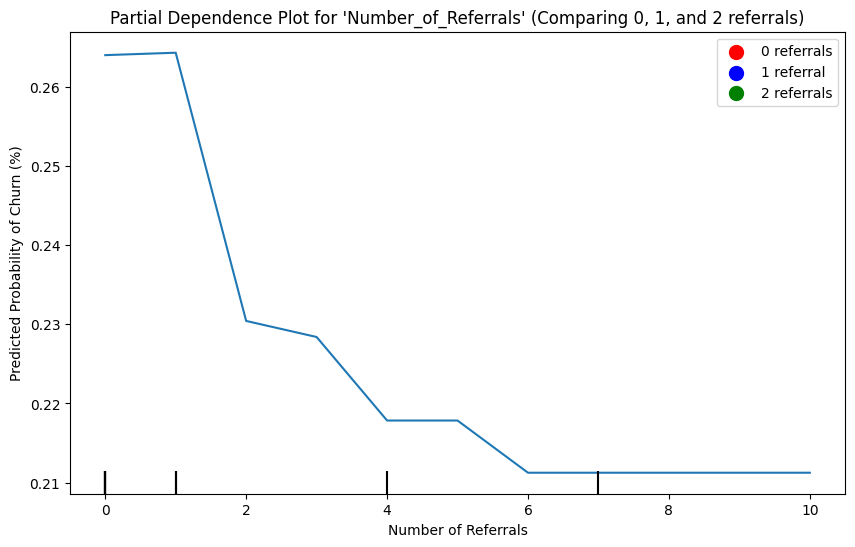

In [68]:
# Step 1: Define features (X) and target (y) including the 'Number_of_Referrals' feature
X = post_dummy_df.drop(columns=['Churn_Yes'])
y = post_dummy_df['Churn_Yes']

# Step 2: Re-split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Step 3: Re-train the Random Forest model with the new features
random_forest = RandomForestClassifier(n_estimators=2, random_state=1)
random_forest.fit(X_train, y_train)

# Step 4: Create Partial Dependence Plot (PDP) for the 'Number_of_Referrals' feature
# Highlighting specific points (e.g., 0, 1, 2 referrals)
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(random_forest, X_train, ['Number_of_Referrals'], ax=ax, grid_resolution=100)

# Convert y-axis to percentages
ax.set_ylabel("Predicted Probability of Churn (%)")

# Step 5: Highlight 0, 1, and 2 referrals in percentages
proba_0_referrals = random_forest.predict_proba(X_train[X_train['Number_of_Referrals'] == 0])[:, 1].mean() * 100
proba_1_referrals = random_forest.predict_proba(X_train[X_train['Number_of_Referrals'] == 1])[:, 1].mean() * 100
proba_2_referrals = random_forest.predict_proba(X_train[X_train['Number_of_Referrals'] == 2])[:, 1].mean() * 100

plt.scatter(0, proba_0_referrals, color='red', s=100, label='0 referrals')
plt.scatter(1, proba_1_referrals, color='blue', s=100, label='1 referral')
plt.scatter(2, proba_2_referrals, color='green', s=100, label='2 referrals')

# Step 6: Finalize and show the plot
plt.title("Partial Dependence Plot for 'Number_of_Referrals' (Comparing 0, 1, and 2 referrals)")
plt.xlabel("Number of Referrals")
plt.ylabel("Predicted Probability of Churn (%)")
plt.legend()
plt.show()

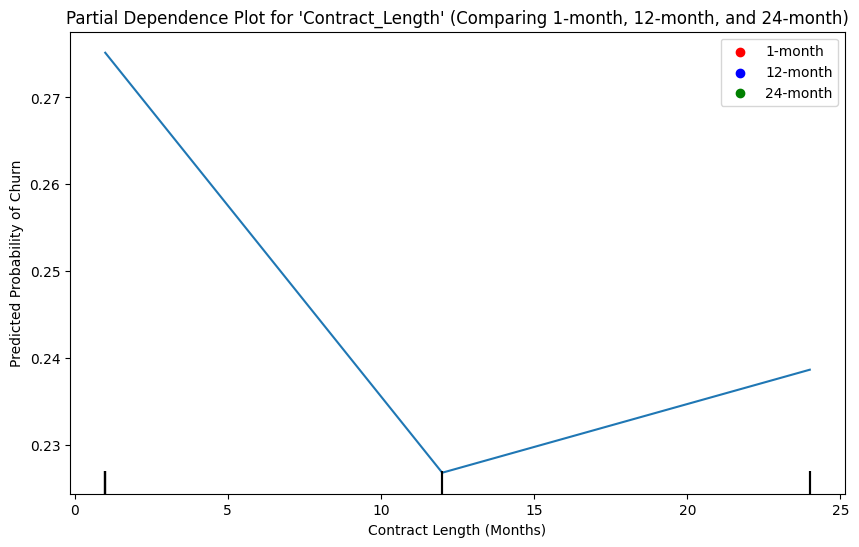

In [69]:


# Step 1: Create the 'Contract_Length' feature based on existing contract features
post_dummy_df['Contract_Length'] = (
    post_dummy_df['Contract_Month-to-Month'] * 1 +
    post_dummy_df['Contract_One_Year'] * 12 +
    post_dummy_df['Contract_Two_Year'] * 24
)

# Step 2: Redefine features (X) and target (y) including the new 'Contract_Length' feature
X = post_dummy_df.drop(columns=['Churn_Yes'])
y = post_dummy_df['Churn_Yes']

# Step 3: Re-split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Step 4: Re-train the Random Forest model with the new features
random_forest = RandomForestClassifier(n_estimators=2, random_state=1)
random_forest.fit(X_train, y_train)

# Step 5: Create Partial Dependence Plot (PDP) for the 'Contract_Length' feature
# Comparing 1-month, 12-month, and 24-month contracts
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(random_forest, X_train, ['Contract_Length'], ax=ax, grid_resolution=100)

# Step 6: Highlight 1-month, 12-month, and 24-month points
plt.scatter(1, random_forest.predict_proba(X_train[X_train['Contract_Length'] == 1])[0, 1], color='red', label='1-month')
plt.scatter(12, random_forest.predict_proba(X_train[X_train['Contract_Length'] == 12])[0, 1], color='blue', label='12-month')
plt.scatter(24, random_forest.predict_proba(X_train[X_train['Contract_Length'] == 24])[0, 1], color='green', label='24-month')

# Step 7: Finalize and show the plot
plt.title("Partial Dependence Plot for 'Contract_Length' (Comparing 1-month, 12-month, and 24-month)")
plt.xlabel("Contract Length (Months)")
plt.ylabel("Predicted Probability of Churn")
plt.legend()
plt.show()


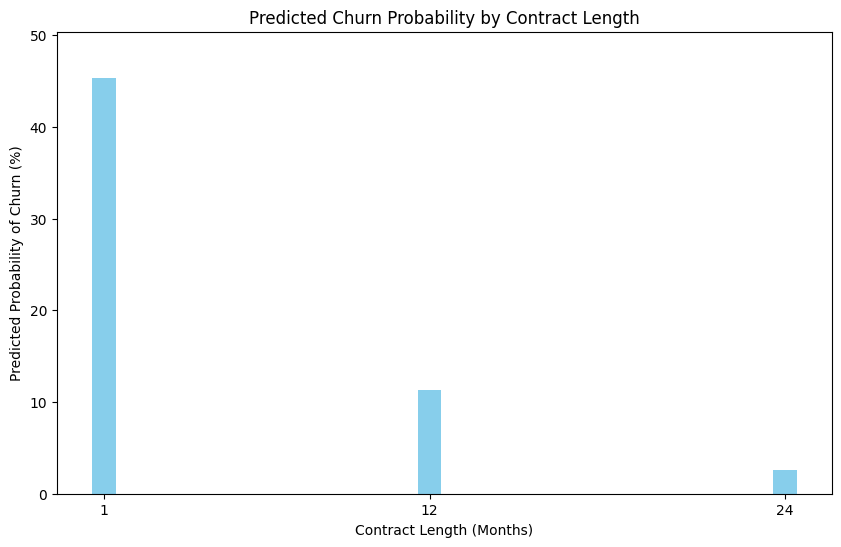

In [70]:
# Calculate predicted probabilities for each contract length (unique values)
unique_contract_lengths = sorted(X_train['Contract_Length'].unique())
proba_by_contract = [random_forest.predict_proba(X_train[X_train['Contract_Length'] == cl])[:, 1].mean() * 100 for cl in unique_contract_lengths]

# Create a bar plot for contract lengths
plt.figure(figsize=(10, 6))
plt.bar(unique_contract_lengths, proba_by_contract, color='skyblue')

# Customize the plot
plt.title("Predicted Churn Probability by Contract Length")
plt.xlabel("Contract Length (Months)")
plt.ylabel("Predicted Probability of Churn (%)")
plt.xticks(unique_contract_lengths)
plt.ylim(0, max(proba_by_contract) + 5)

# Show the plot
plt.show()

# Model Comparison

In [74]:
# Define models and their predictions
models = ['Full Regression', 'K-Nearest Neighbors', 'Neural Network', 'Random Forest']
predictions = [y_pred_log_reg, y_pred_knn, y_pred_mlp, y_pred_random_forest]

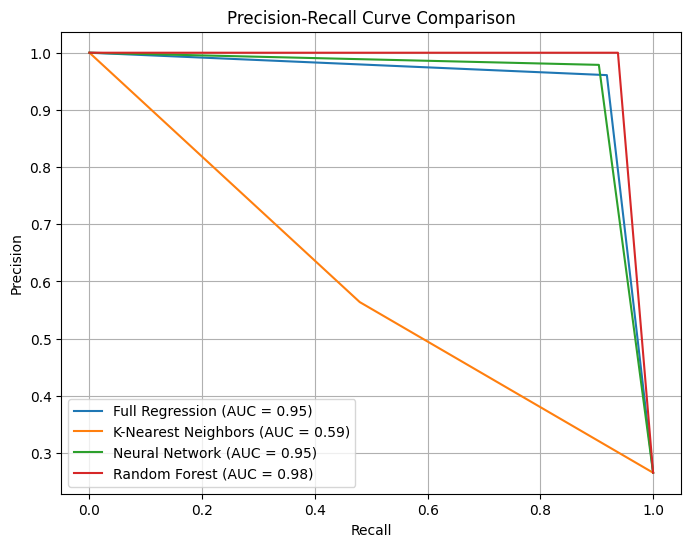

In [75]:
from sklearn.metrics import precision_recall_curve, auc

plt.figure(figsize=(8, 6))
for model, y_pred in zip(models, predictions):
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model} (AUC = {auc_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

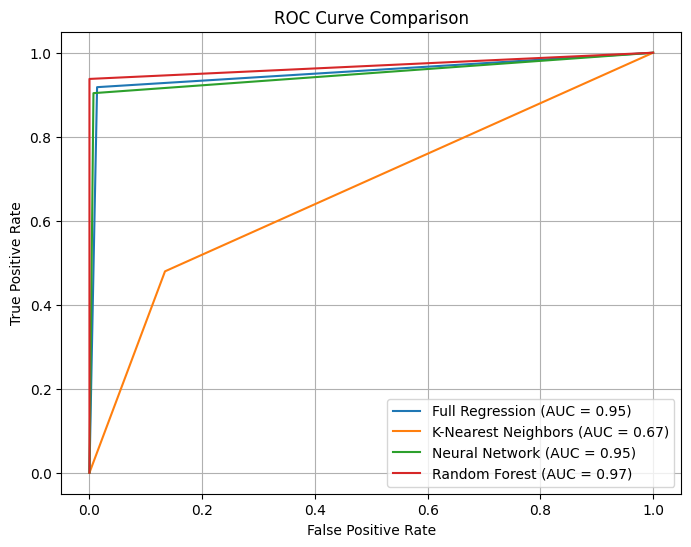

In [76]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(8, 6))
for model, y_pred in zip(models, predictions):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc_score:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

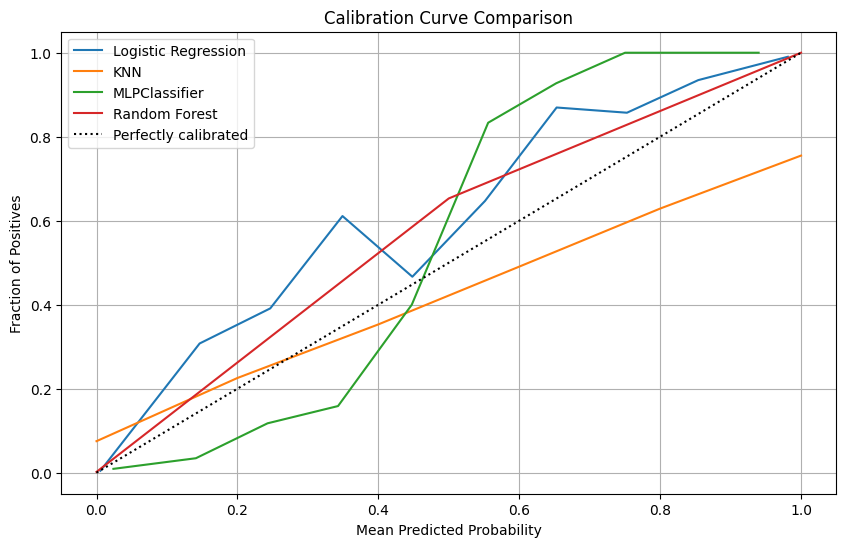

In [ ]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 6))
for model, name in zip([log_reg, knn, mlp, random_forest],
                       ['Logistic Regression', 'KNN', 'MLPClassifier', 'Random Forest']):
    prob_pos = model.predict_proba(X_test)[:, 1]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, label=f'{name}')

plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

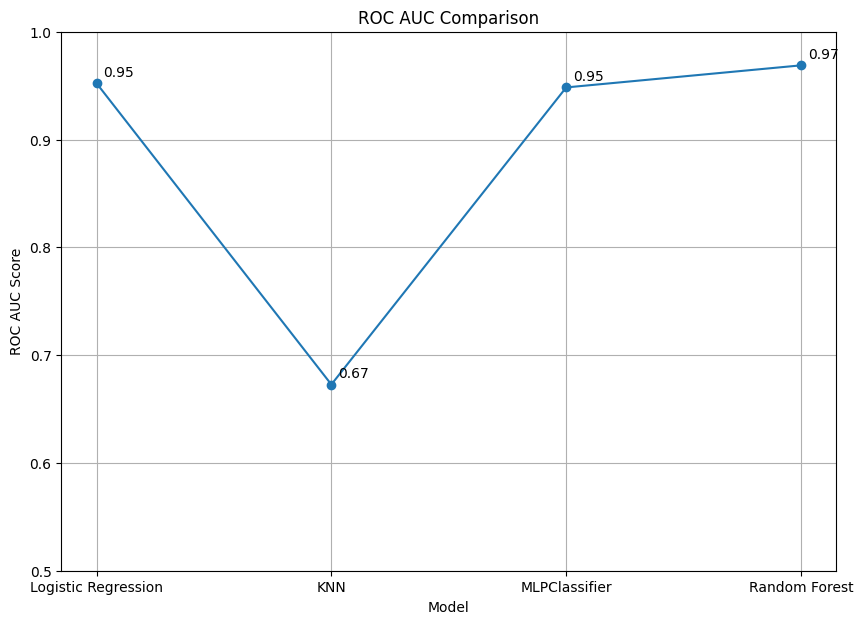

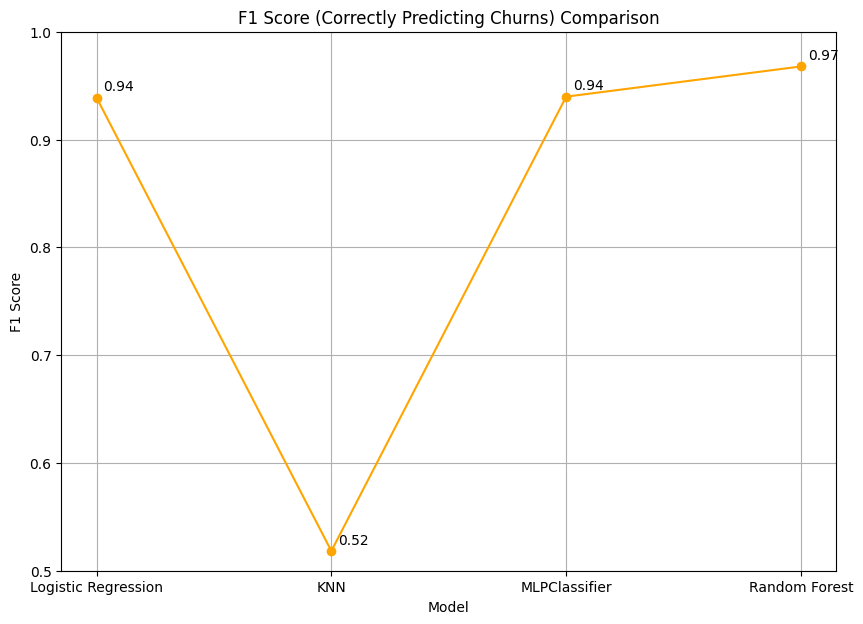

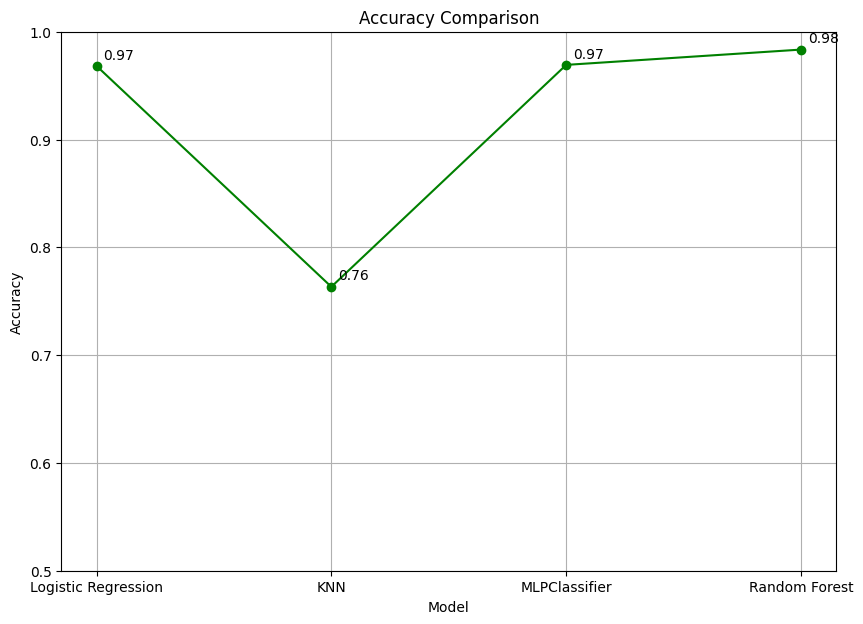

In [ ]:
metrics = {
    'Model': ['Logistic Regression', 'KNN', 'MLPClassifier', 'Random Forest'],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_log_reg),
        roc_auc_score(y_test, y_pred_knn),
        roc_auc_score(y_test, y_pred_mlp),
        roc_auc_score(y_test, y_pred_random_forest)
    ],
    'F1 Score (Correctly Predicting Churns)': [
        classification_report(y_test, y_pred_log_reg, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_mlp, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_random_forest, output_dict=True)['1']['f1-score']
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_mlp),
        accuracy_score(y_test, y_pred_random_forest)
    ]
}

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot ROC AUC
plt.figure(figsize=(10, 7))
plt.plot(metrics_df['Model'], metrics_df['ROC AUC'], marker='o')
for i, value in enumerate(metrics_df['ROC AUC']):
    plt.annotate(f'{value:.2f}', xy=(metrics_df['Model'][i], value), xytext=(5, 5), textcoords='offset points')
plt.title('ROC AUC Comparison')
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.ylim(0.5, 1)
plt.grid(True)
plt.show()

# Plot F1 Score for Class 1
plt.figure(figsize=(10, 7))
plt.plot(metrics_df['Model'], metrics_df['F1 Score (Correctly Predicting Churns)'], marker='o', color='orange')
for i, value in enumerate(metrics_df['F1 Score (Correctly Predicting Churns)']):
    plt.annotate(f'{value:.2f}', xy=(metrics_df['Model'][i], value), xytext=(5, 5), textcoords='offset points')
plt.title('F1 Score (Correctly Predicting Churns) Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0.5, 1)
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 7))
plt.plot(metrics_df['Model'], metrics_df['Accuracy'], marker='o', color='green')
for i, value in enumerate(metrics_df['Accuracy']):
    plt.annotate(f'{value:.2f}', xy=(metrics_df['Model'][i], value), xytext=(5, 5), textcoords='offset points')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.grid(True)
plt.show()

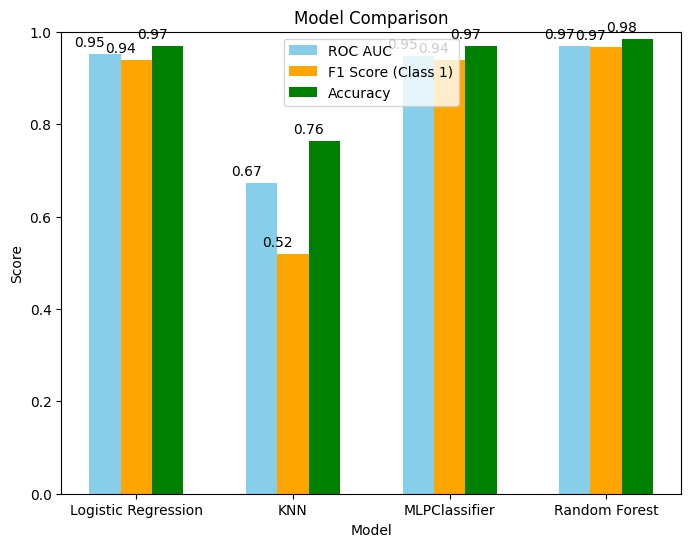

In [ ]:
# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Set up bar chart positions
bar_width = 0.2
index = np.arange(len(metrics_df['Model']))

# Plot combined bar chart with smaller size
plt.figure(figsize=(8, 6))  # Reduced the size of the figure

# ROC AUC bars
plt.bar(index, metrics_df['ROC AUC'], bar_width, label='ROC AUC', color='skyblue')

# F1 Score (Class 1) bars
plt.bar(index + bar_width, metrics_df['F1 Score (Class 1)'], bar_width, label='F1 Score (Class 1)', color='orange')

# Accuracy bars
plt.bar(index + 2 * bar_width, metrics_df['Accuracy'], bar_width, label='Accuracy', color='green')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(index + bar_width, metrics_df['Model'])
plt.ylim(0, 1)

# Add a legend
plt.legend()

# Add data labels
for i, value in enumerate(metrics_df['ROC AUC']):
    plt.text(i - bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(metrics_df['F1 Score (Class 1)']):
    plt.text(i + bar_width/2, value + 0.01, f'{value:.2f}', ha='center', va='bottom')
for i, value in enumerate(metrics_df['Accuracy']):
    plt.text(i + 1.5 * bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()